In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from pylab import rcParams
%matplotlib inline

#### DATA MINING & EXPLORATION :-

In [2]:
# Loading The Csv With Pandas

data = pd.read_csv('Telco_Customer_Churn.csv')
data.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

##### Data Compises Of Services -- Which Services The Customer Subscribed To (Internet, Phone, Cable, Etc.), Monthly Bill Total, Tenure — How Long They Had Been A Customer, Basic Demographic Info — Whether They Were Elderly,Had Dependents, Etc.

In [3]:
# This Shows 21 Columns And 7043 Rows In Dataset

data.shape  

(7043, 21)

In [4]:
# Column Details

data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# Types Of Data In Dataset

data.dtypes 

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
# Removing Customer Ids From The Data Set The Columns Not Used In The Predictive Model.

df = data.drop("customerID", axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


##### The Dataset Has A Lot Of Categorical Variables Rendered As Text Values (‘yes’,’no’,etc.) In The Columns.Converting The Categorical Values Into Numeric Values To Facilitate Ml Algorithms To Process The Data also,Converting Total Charges To A Numerical Data Type.

In [7]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

##### From The Above Output, It Can Be Seen That, There Are 11 Missing Values For Total Charges.Replacing 11 Rows From The Data Set. Also Predictor Variable Here Is Churn. Therefore, It Is Necessary To Convert The Predictor Variable In Binary Numeric Variable.

In [8]:
df.dropna(inplace = True)

df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df['Churn'].replace(to_replace='No',  value=0, inplace=True)

# Converting All The Categorical Variables Into Dummy Variables
df_dummies = pd.get_dummies(df)
df_dummies.head()

C:\Users\rakes\AppData\Local\Temp\ipykernel_20556\27488963.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
C:\Users\rakes\AppData\Local\Temp\ipykernel_20556\27488963.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


SeniorCitizen  tenure  MonthlyCharges  TotalCharges  Churn  gender_Female  \
0              0       1           29.85         29.85      0           True   
1              0      34           56.95       1889.50      0          False   
2              0       2           53.85        108.15      1          False   
3              0      45           42.30       1840.75      0          False   
4              0       2           70.70        151.65      1           True   

   gender_Male  Partner_No  Partner_Yes  Dependents_No  ...  \
0        False       False         True           True  ...   
1         True        True        False           True  ...   
2         True        True        False           True  ...   
3         True        True        False           True  ...   
4        False        True        False           True  ...   

   StreamingMovies_Yes  Contract_Month-to-month  Contract_One year  \
0                False                     True              False   
1                False                    False               True   
2                False                     True              False   
3                False                    False               True   
4                False                     True              False   

   Contract_Two year  PaperlessBilling_No  PaperlessBilling_Yes  \
0              False                False                  True   
1              False                 True                 False   
2              False                False                  True   
3              False                 True                 False   
4              False                False                  True   

   PaymentMethod_Bank transfer (automatic)  \
0                                    False   
1                                    False   
2                                    False   
3                                     True   
4                                    False   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                  False                            True   
1                                  False                           False   
2                                  False                           False   
3                                  False                           False   
4                                  False                            True   

   PaymentMethod_Mailed check  
0                       False  
1                        True  
2                        True  
3                       False  
4                       False  

[5 rows x 46 columns]

In [9]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 46 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7032 non-null   int64  
 1   tenure                                   7032 non-null   int64  
 2   MonthlyCharges                           7032 non-null   float64
 3   TotalCharges                             7032 non-null   float64
 4   Churn                                    7032 non-null   int64  
 5   gender_Female                            7032 non-null   bool   
 6   gender_Male                              7032 non-null   bool   
 7   Partner_No                               7032 non-null   bool   
 8   Partner_Yes                              7032 non-null   bool   
 9   Dependents_No                            7032 non-null   bool   
 10  Dependents_Yes                           7032 non-nul

##### Correlations Between Customer Data Features And Customer Churn

Examining The Correlation Between Churn And Each Customer Feature To Decide Which Features Of The Data To Include In The Predictive Churn Model.

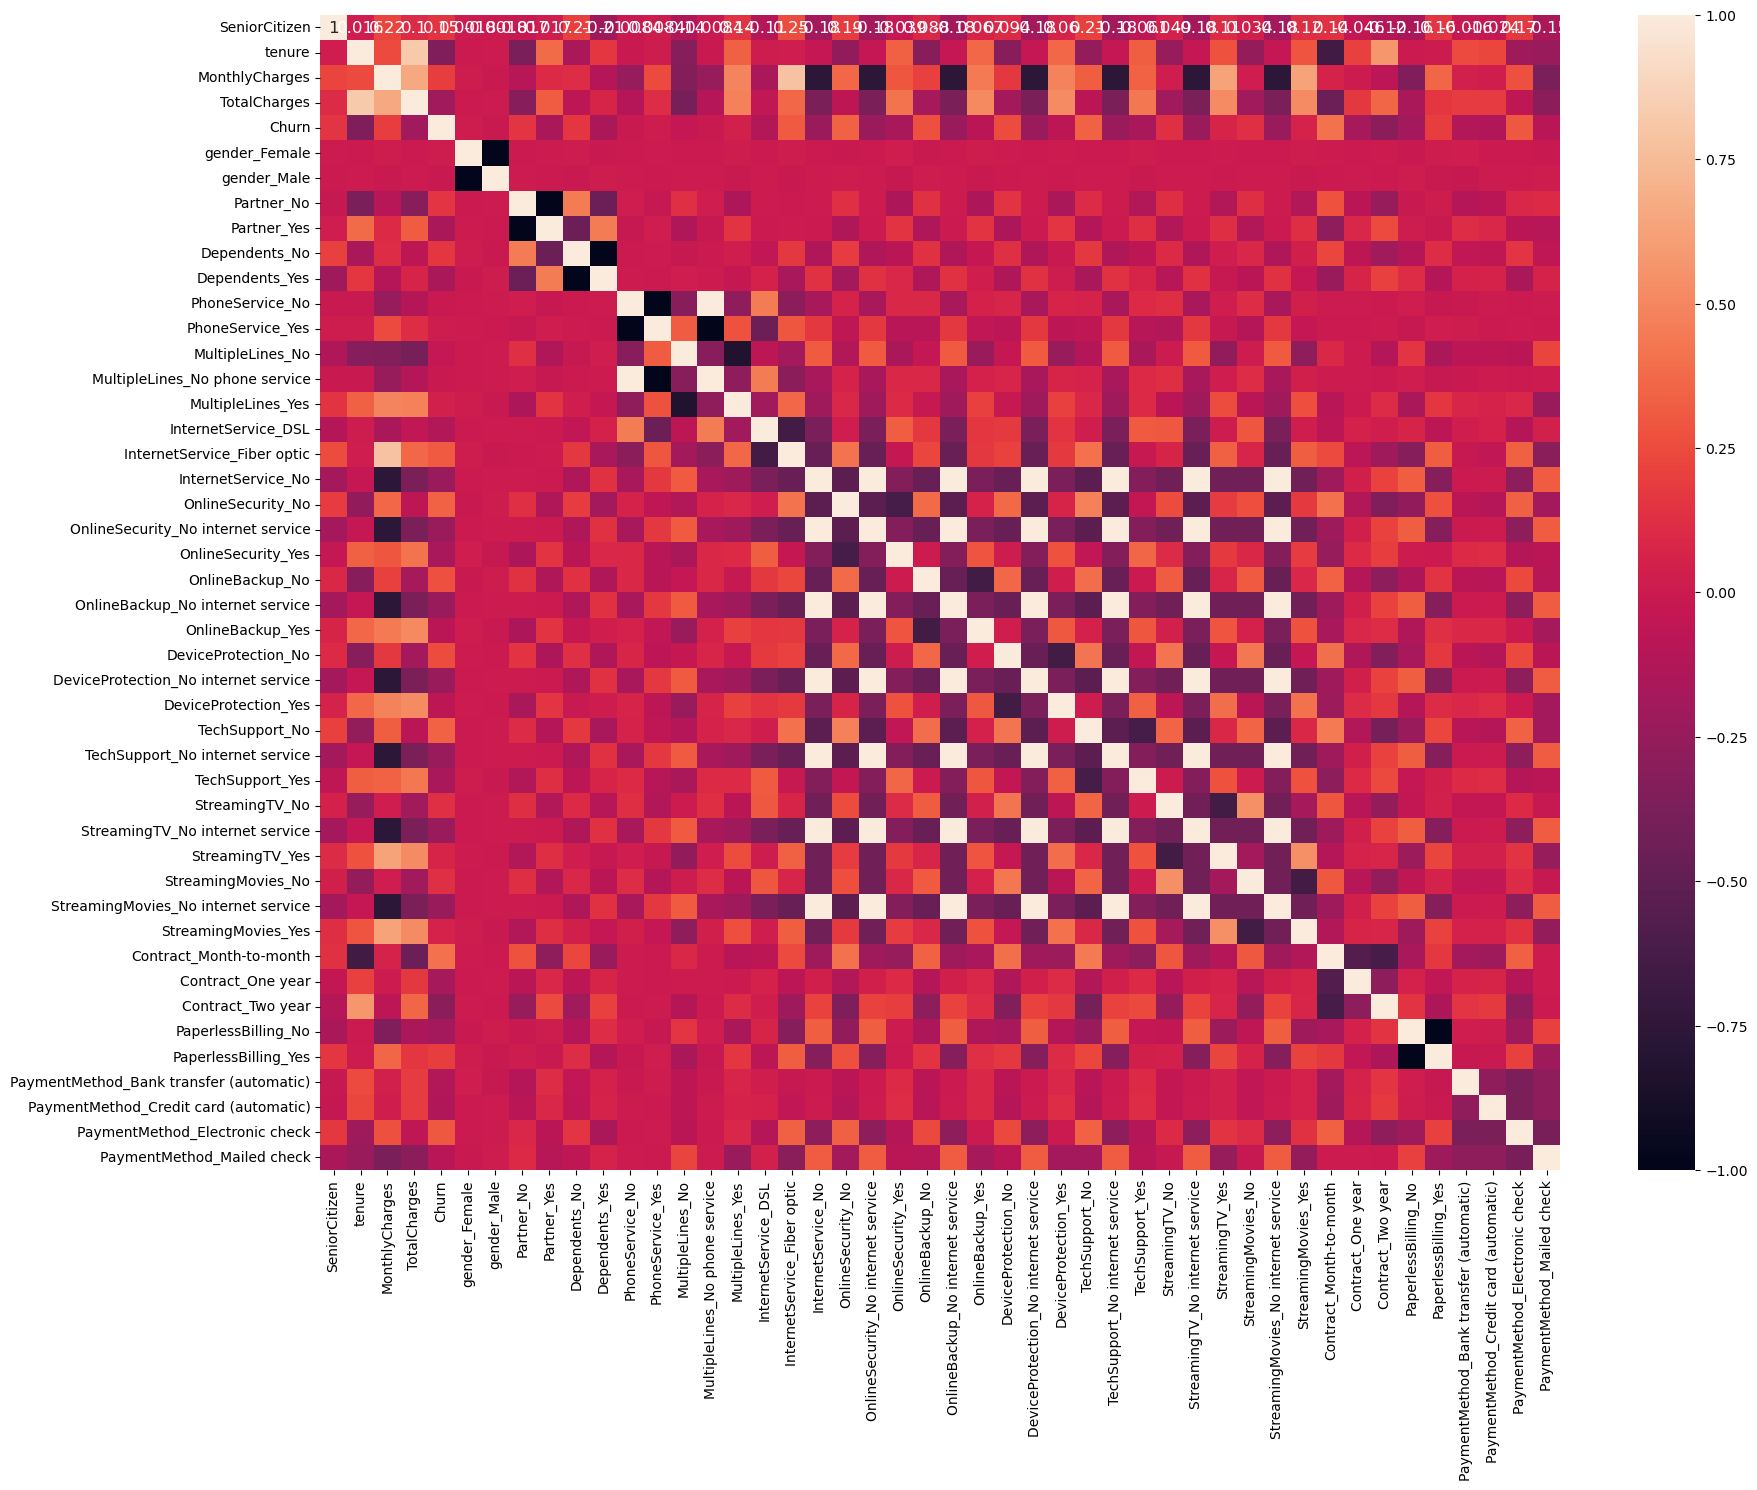

In [10]:
corr = df_dummies.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot = True, annot_kws={'size':12})
heat_map=plt.gcf()
heat_map.set_size_inches(20,15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

##### To Avoid Unstable Estimates Of Coeffiecients In The Model, Need To Drop The ‘TotalCharges’ Variable During Regression Process, As It Is Highly Correlated To Both ‘tenure’ And ‘MonthlyCharges’.

<Axes: >

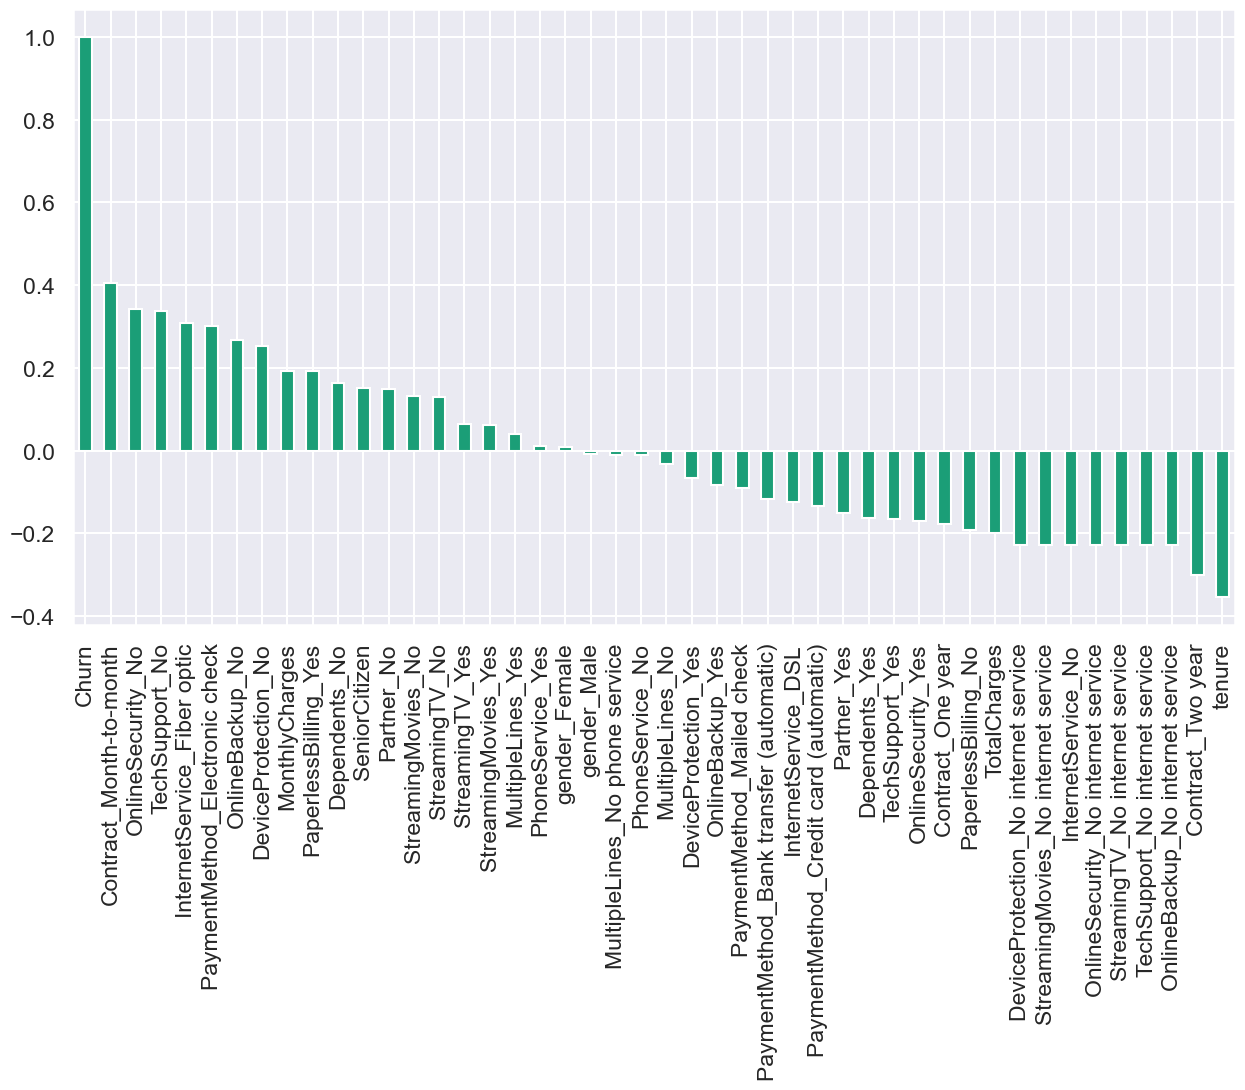

In [11]:
# Checking Again Correlation Of "Churn" With Other Variables On A Different Plot
sns.set(style='darkgrid', context='talk', palette='Dark2')
plt.figure(figsize=(15,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

It Can Be Seen From Above Correlation Plot That, Contract_Month-To-Month, Online Security_No, Tech Support_No...etc. 
Are Positively Correlated With Churn. While, On The Other End Of The Plot, Tenure, Contract_two Year, InternetService_No...etc. 
Are Negatively Correlated With Churn.

Interestingly, Services Such As Online Security, Streamingtv, Onlinebackup, Techsupport..., Etc. 
With InternetService_No Seem To Be Negatively Related To Churn. Need To Explore The Patterns More For The Above Correlations 
Below Before Modelling And Identifying The Important Variables.

In [13]:
# Reporting Correlation Matrix

df_dummies.corr()  

SeniorCitizen    tenure  \
SeniorCitizen                                 1.000000  0.015683   
tenure                                        0.015683  1.000000   
MonthlyCharges                                0.219874  0.246862   
TotalCharges                                  0.102411  0.825880   
Churn                                         0.150541 -0.354049   
gender_Female                                 0.001819 -0.005285   
gender_Male                                  -0.001819  0.005285   
Partner_No                                   -0.016957 -0.381912   
Partner_Yes                                   0.016957  0.381912   
Dependents_No                                 0.210550 -0.163386   
Dependents_Yes                               -0.210550  0.163386   
PhoneService_No                              -0.008392 -0.007877   
PhoneService_Yes                              0.008392  0.007877   
MultipleLines_No                             -0.136377 -0.323891   
MultipleLines_No phone service               -0.008392 -0.007877   
MultipleLines_Yes                             0.142996  0.332399   
InternetService_DSL                          -0.108276  0.013786   
InternetService_Fiber optic                   0.254923  0.017930   
InternetService_No                           -0.182519 -0.037529   
OnlineSecurity_No                             0.185145 -0.265987   
OnlineSecurity_No internet service           -0.182519 -0.037529   
OnlineSecurity_Yes                           -0.038576  0.328297   
OnlineBackup_No                               0.087539 -0.314769   
OnlineBackup_No internet service             -0.182519 -0.037529   
OnlineBackup_Yes                              0.066663  0.361138   
DeviceProtection_No                           0.094403 -0.314820   
DeviceProtection_No internet service         -0.182519 -0.037529   
DeviceProtection_Yes                          0.059514  0.361520   
TechSupport_No                                0.205254 -0.264363   
TechSupport_No internet service              -0.182519 -0.037529   
TechSupport_Yes                              -0.060577  0.325288   
StreamingTV_No                                0.048664 -0.246814   
StreamingTV_No internet service              -0.182519 -0.037529   
StreamingTV_Yes                               0.105445  0.280264   
StreamingMovies_No                            0.034196 -0.252890   
StreamingMovies_No internet service          -0.182519 -0.037529   
StreamingMovies_Yes                           0.119842  0.285402   
Contract_Month-to-month                       0.137752 -0.649346   
Contract_One year                            -0.046491  0.202338   
Contract_Two year                            -0.116205  0.563801   
PaperlessBilling_No                          -0.156258 -0.004823   
PaperlessBilling_Yes                          0.156258  0.004823   
PaymentMethod_Bank transfer (automatic)      -0.016235  0.243822   
PaymentMethod_Credit card (automatic)        -0.024359  0.232800   
PaymentMethod_Electronic check                0.171322 -0.210197   
PaymentMethod_Mailed check                   -0.152987 -0.232181   

                                         MonthlyCharges  TotalCharges  \
SeniorCitizen                                  0.219874      0.102411   
tenure                                         0.246862      0.825880   
MonthlyCharges                                 1.000000      0.651065   
TotalCharges                                   0.651065      1.000000   
Churn                                          0.192858     -0.199484   
gender_Female                                  0.013779     -0.000048   
gender_Male                                   -0.013779      0.000048   
Partner_No                                    -0.097825     -0.319072   
Partner_Yes                                    0.097825      0.319072   
Dependents_No                                  0.112343     -0.064653   
Dependents_Yes                           

#### DATA EXPLORATION AND VISUALISATION

Doing More Visualization To Better Understand The Patterns In The Data And Potentially Form Some Hypothesis. 
First Looking At The Distribution Of Individual Variables And Then Slice And Dice The Data For To Check If Interesting Trends Are Present.

###### DEMOGRAPHICS TO UNDERSTAND THE GENDER, AGE RANGE, PATNER AND DEPENDENT STATUS OF THE CUSTOMERS  

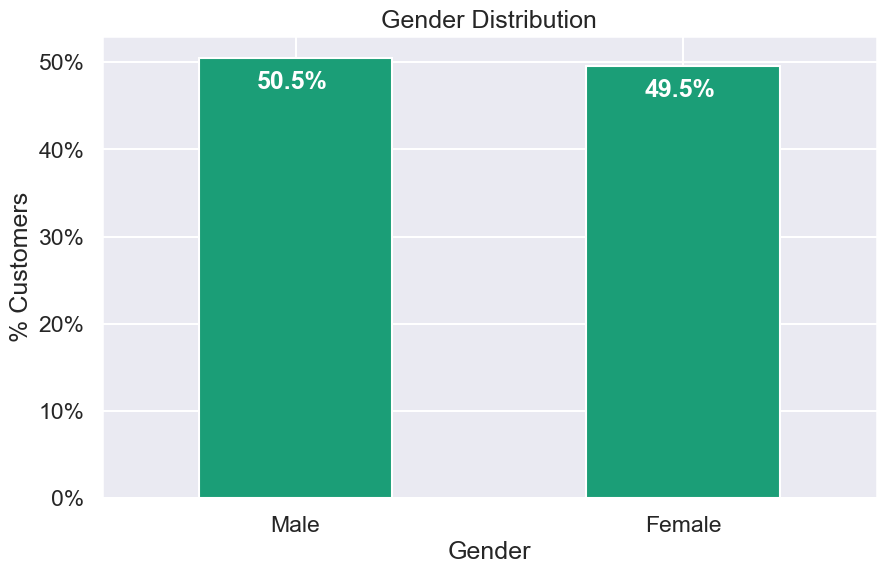

In [14]:
import matplotlib.ticker as mtick  # For Specifying The Axes Tick Format 
rcParams['figure.figsize']=10,6

ax = (df['gender'].value_counts()*100.0 /len(df)).plot(kind='bar', stacked = True, rot = 0)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
ax.set_ylabel('% Customers')
ax.set_title('Gender Distribution')

totals = []  # Creating A List To Collect The Plt.patches Data

# Finding The Values And Append To List
for i in ax.patches:
    totals.append(i.get_width())

total = sum(totals)  # Setting Individual Bar Lables Using Above List

for i in ax.patches:
    # Getting_Width Pulls Left Or Right; Get_y Pushes Up Or Down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%', color='white', weight = 'bold')

Text(0.5, 1.0, '% of Senior Citizens')

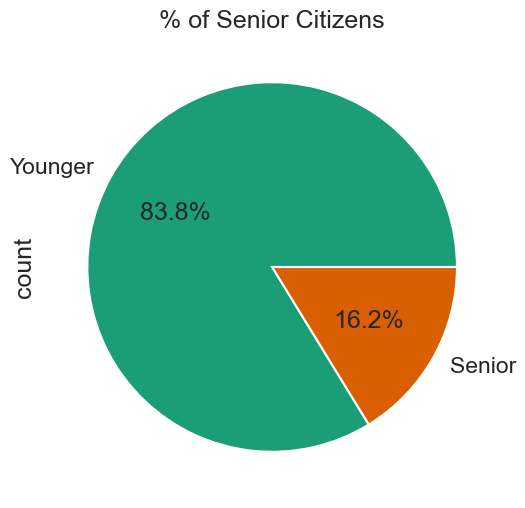

In [15]:
ax = (df['SeniorCitizen'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['Younger', 'Senior'])                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_title('% of Senior Citizens')

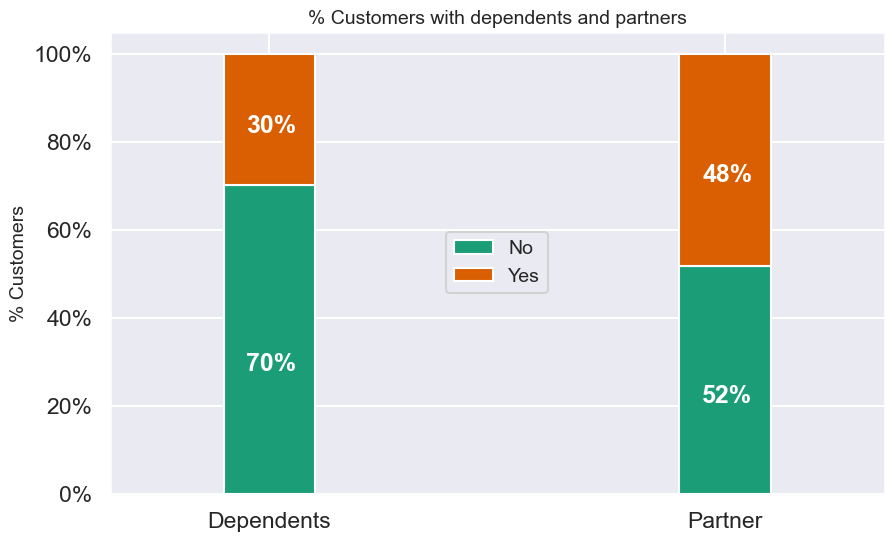

In [16]:
df = pd.melt(data, id_vars=['customerID'], value_vars=['Dependents','Partner'])
df1 = df.groupby(['variable','value']).count().unstack()
df1 = df1*100/len(data)
ax = df1.loc[:,'customerID'].plot.bar(stacked=True, figsize=(10,6),rot = 0,width = 0.2)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('')
ax.set_title('% Customers with dependents and partners',size = 14)
ax.legend(loc = 'center',prop={'size':14})

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold')

From Above Plot, It Can Be Seen That, 48% Of The Customers Have A Partner Channel, 
While Only 30% Of The Total Customers Have Dependents.
It Would Be Interesting Is To Look At The % Of Customers With Both Partners And Dependents.

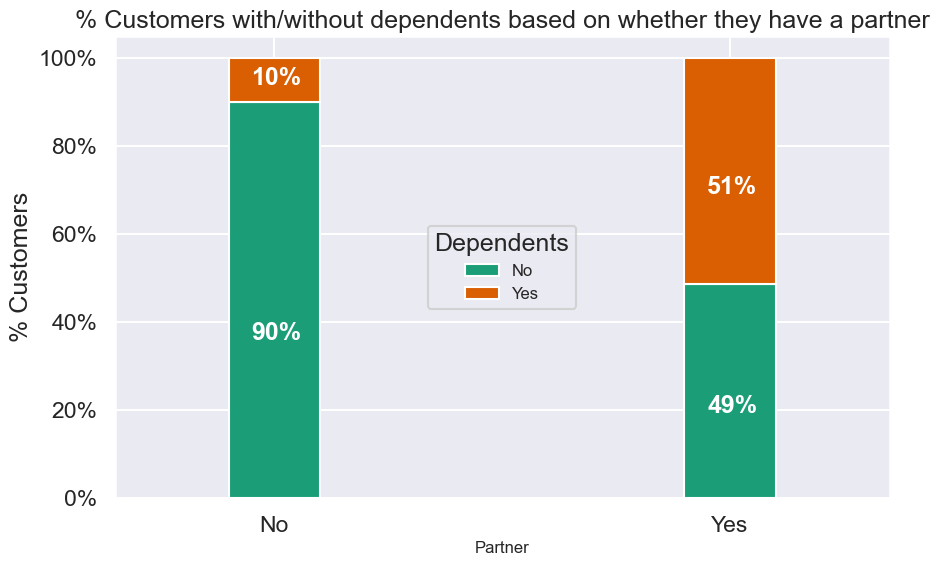

In [17]:
partner_dependents = data.groupby(['Partner','Dependents']).size().unstack()

ax = (partner_dependents.T*100.0 / partner_dependents.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (10,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':12},title = 'Dependents')
ax.set_ylabel('% Customers')
ax.set_title('% Customers with/without dependents based on whether they have a partner')
ax.xaxis.label.set_size(12)

# Code To Add The Data Labels On The Stacked Bar Chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold')

Interestingly, Among The Customers Who Have A Partner, Only About Half Of Them (51%) Also Have A Dependent, 
While Other Half (49%) Do Not Have Any Independents. Additionally, As Expected, Among The Customers Who Do Not Have Any Partner, 
A Majority (90%) Of Them Do Not Have Any Dependents

A Review Of Any Differences Between The % Of Customers With/without Dependents And Partners By Gender Reveal That, 
There Is No Difference In Their Distribution By Gender. Additionally, There Is No Difference In Senior Citizen Status By Gender.

##### CUSTOMER ACCOUNT INFORMATION

C:\Users\rakes\AppData\Local\Temp\ipykernel_20556\1845955938.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data['tenure'], hist=True, kde=False,


Text(0.5, 1.0, 'Number of Customers by tenure')

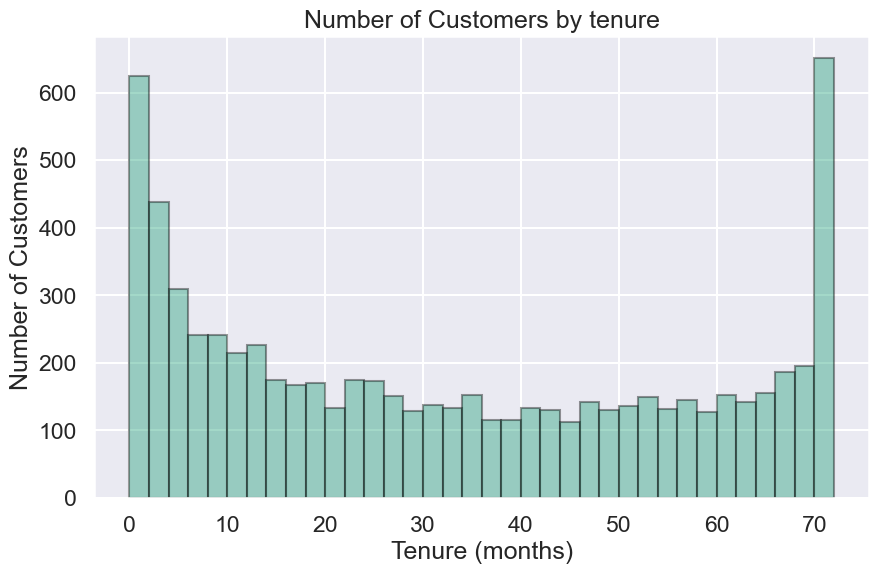

In [18]:
ax = sns.distplot(data['tenure'], hist=True, kde=False, 
             bins=int(180/5), 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('Number of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Number of Customers by tenure')

The Above Histogram Displays A Lot Of Customers Have Been With The Telecom Company For Just A Month, 
While Quite A Many Are There For About 70 Months. This Could Be Potentially Because Of Different Contractual Agrrement Some Customers Might Have.

##### CHECKING THE CUSTOMERS BY TENURE OF CONTRACT

Text(0.5, 1.0, 'Number of Customers by Contract Type')

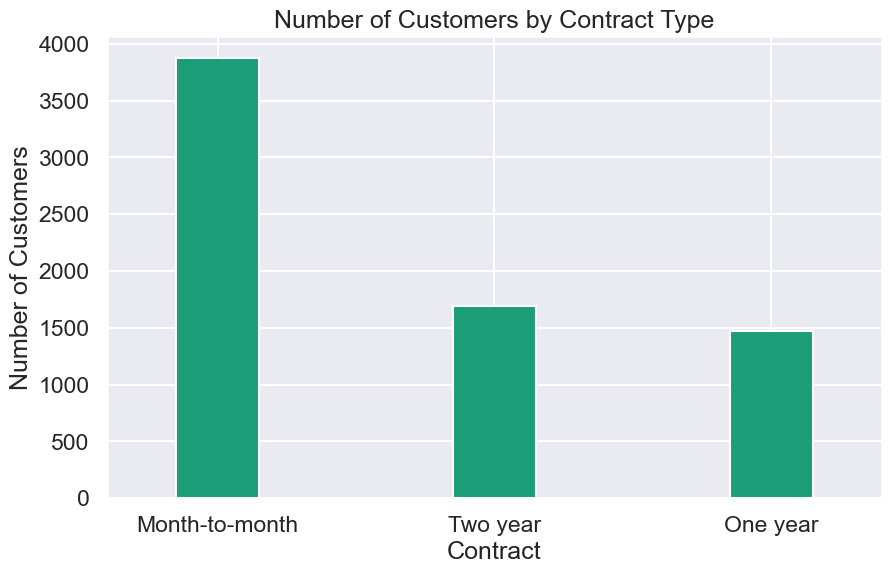

In [19]:
ax = data['Contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3)
ax.set_ylabel('Number of Customers')
ax.set_title('Number of Customers by Contract Type')

Interestingly Most Of The Monthly Contracts Last For 1-2 Months, While The 2 Year Contracts Tend To Last For About 70 Months.
This Shows That The Customers Taking A Longer Contract Are More Loyal To The Company And Tend To Stay With It For A Longer Period Of Time. 
This Is Also Visible On The Correlation Chart With The Churn Rate. More Of Less Equal Number Of Customers In The 1 Year And 2 Year Contracts; 
Around 1500 Customers Are On 1 Year Contract And Close To Around 1700 Customers Are On 2 Years Contracts.

C:\Users\rakes\AppData\Local\Temp\ipykernel_20556\4241607013.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data[data['Contract']=='Month-to-month']['tenure'],
C:\Users\rakes\AppData\Local\Temp\ipykernel_20556\4241607013.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data[da

Text(0.5, 1.0, 'Two Year Contract')

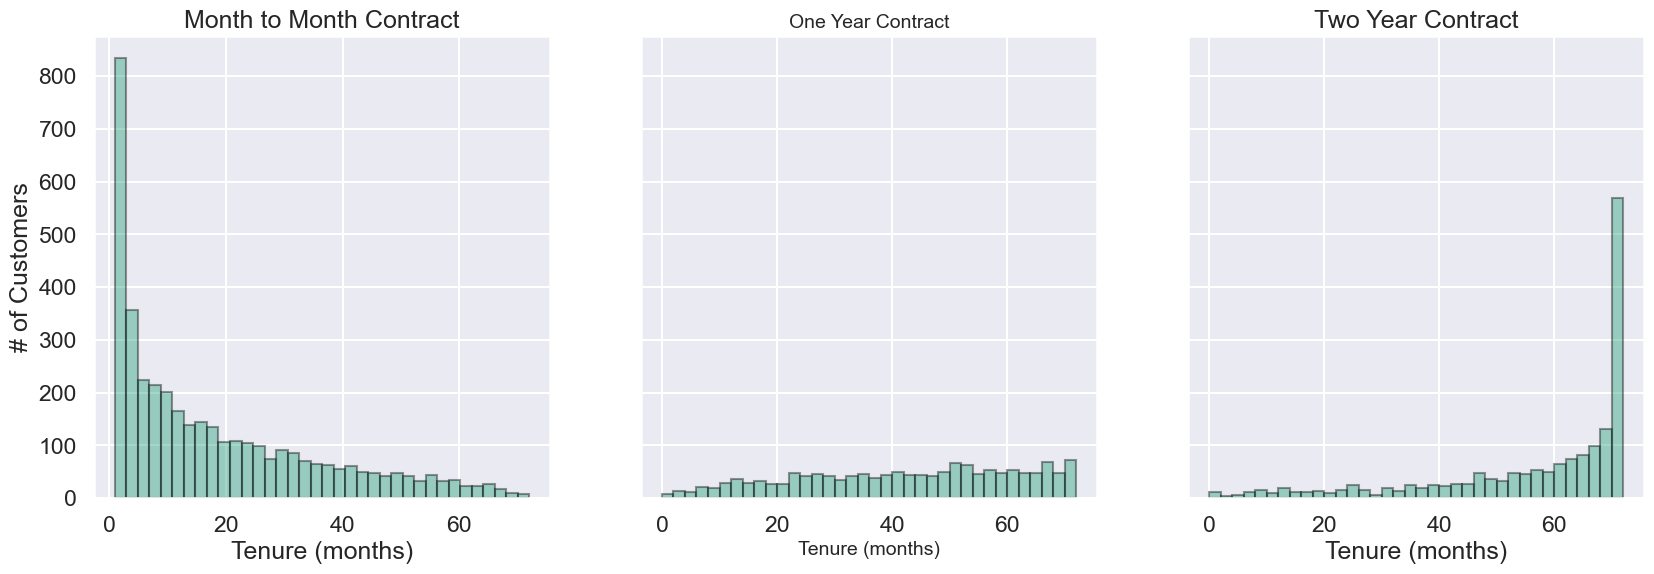

In [20]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (20,6))

ax = sns.distplot(data[data['Contract']=='Month-to-month']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5),
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax1)
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Month to Month Contract')

ax = sns.distplot(data[data['Contract']=='One year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5),
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax2)
ax.set_xlabel('Tenure (months)',size = 14)
ax.set_title('One Year Contract',size = 14)

ax = sns.distplot(data[data['Contract']=='Two year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5),
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax3)

ax.set_xlabel('Tenure (months)')
ax.set_title('Two Year Contract')

##### VISUALIZATION OF THE DISTRIBUTION OF VARIOUS SERVICES USED BY CUSTOMERS  

In [21]:
data.columns.values  

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

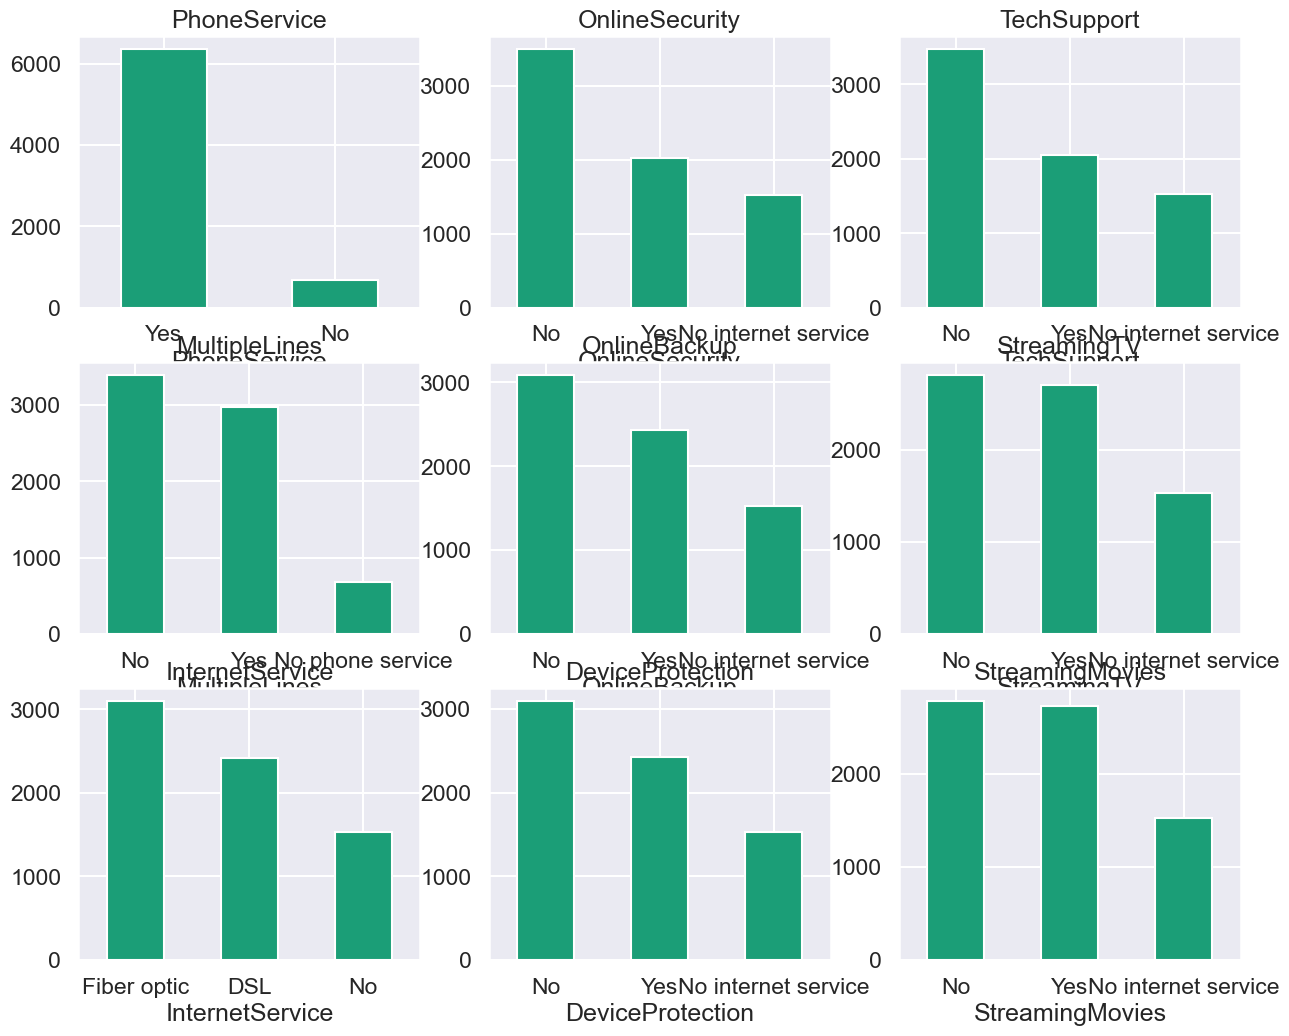

In [22]:
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(services):
    if i < 3:
        ax = data[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0)
        
    elif i >=3 and i < 6:
        ax = data[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0)
        
    elif i < 9:
        ax = data[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0)
    ax.set_title(item)

Above Plot Displays A Clear Visbility Of The Different Services Provided By The Telecom Company And Availabled By The Customers.

#### DATAMINING TO CHECK PREDICTION VARIABLE AND IT'S INTERACTION WITH OTHER VARIABLES   

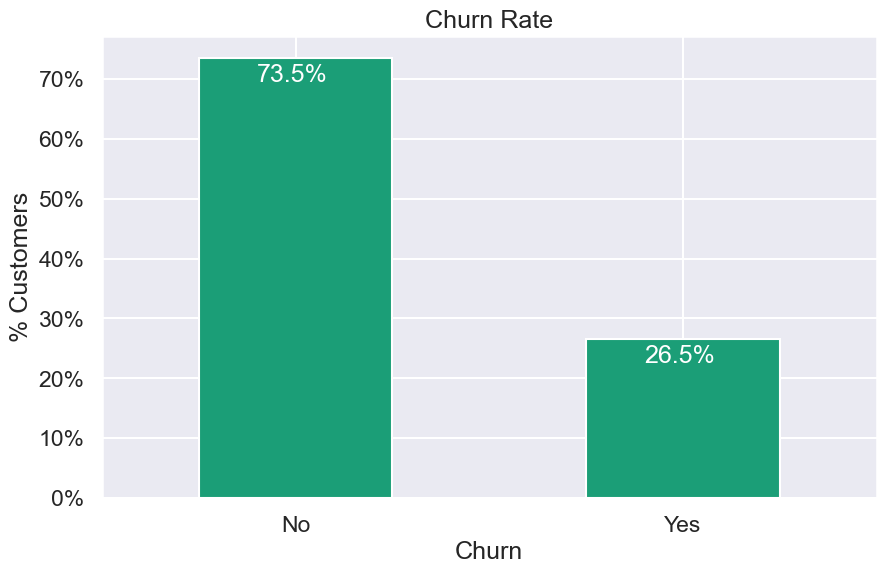

In [23]:
ax = (data['Churn'].value_counts()*100.0 /len(data)).plot(kind='bar', stacked = True,rot = 0)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Churn')
ax.set_title('Churn Rate')

# Create A List To Collect The Plt.patches Data
totals = []

# Find The Values And Append To List
for i in ax.patches:
    totals.append(i.get_width())

# Set Individual Bar Lables Using Above List
total = sum(totals)

for i in ax.patches:
    # Get_width Pulls Left Or Right; Get_y Pushes Up Or Down
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%', color='white')

26.5% Churn Rate Is Cosidered Quite High. However, 73.5 % Of The Customers Do Not Churn. 
Clearly The Data Is Skewed As It Is Always Expected That A Large Majority Of The Customers To Not Churn. 
Skeweness Could Lead To A Lot Of False Negatives In Predictive Modeling.

Text(0, 0.5, 'Monthly Charges')

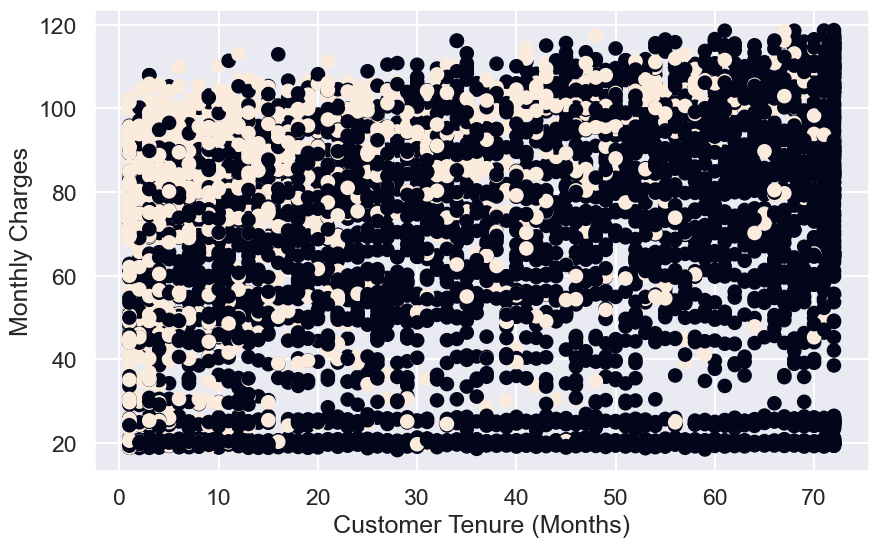

In [24]:
rcParams['figure.figsize']=10,6
sns.set(style='darkgrid', context='talk', palette='Dark2')

plt.scatter(
   df_dummies['tenure'], 
 df_dummies['MonthlyCharges'], c=df_dummies['Churn'])
plt.xlabel('Customer Tenure (Months)')
plt.ylabel('Monthly Charges')

It’s Hard To Draw Any Conclusions From This Visualization Which Compares The Customer’s Tenure With Their Monthly Charges. 
So, This Plot Has Been Redrawn On Boxplot For Better Visualization. However, From Below Plot, It Can Be Clearly Seen That,
The Customers Who Do Not Churn, They Tend To Stay For A Longer Tenure With The Telecom Company.

<Axes: xlabel='Churn', ylabel='tenure'>

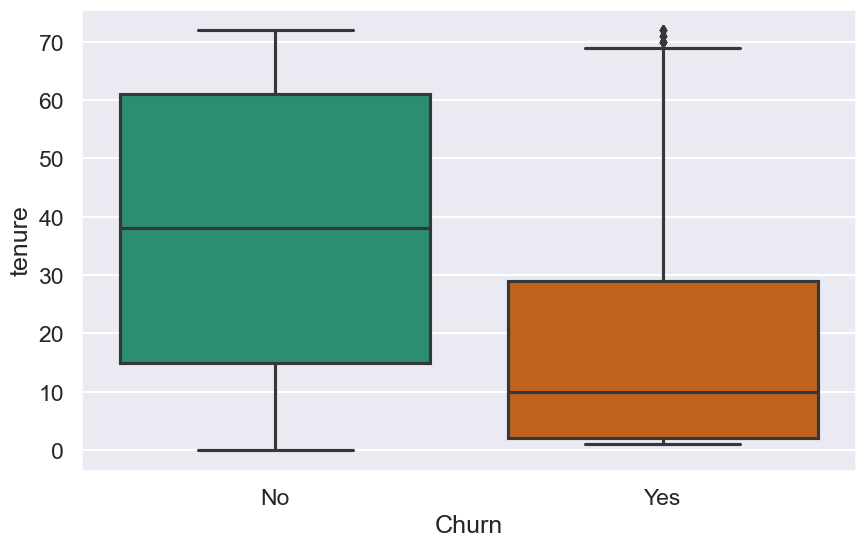

In [25]:
sns.boxplot(x = data.Churn, y = data.tenure)

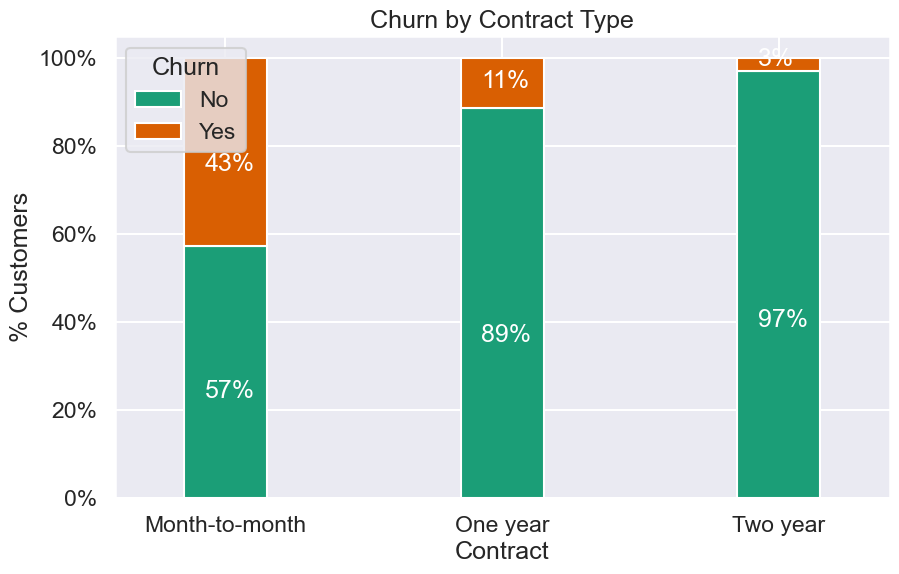

In [26]:
contract_churn = data.groupby(['Contract','Churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',width = 0.3,stacked = True,rot = 0) 
                                                                
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn by Contract Type')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white')

##### Above Plot Too Is No Different From The Correlation Plot And Information We Obtained So Far,The Customers Who Have A Month To Month Contract Have A Very High Churn Rate. This Gives Some Valuable Input To Sales/marketing Department.

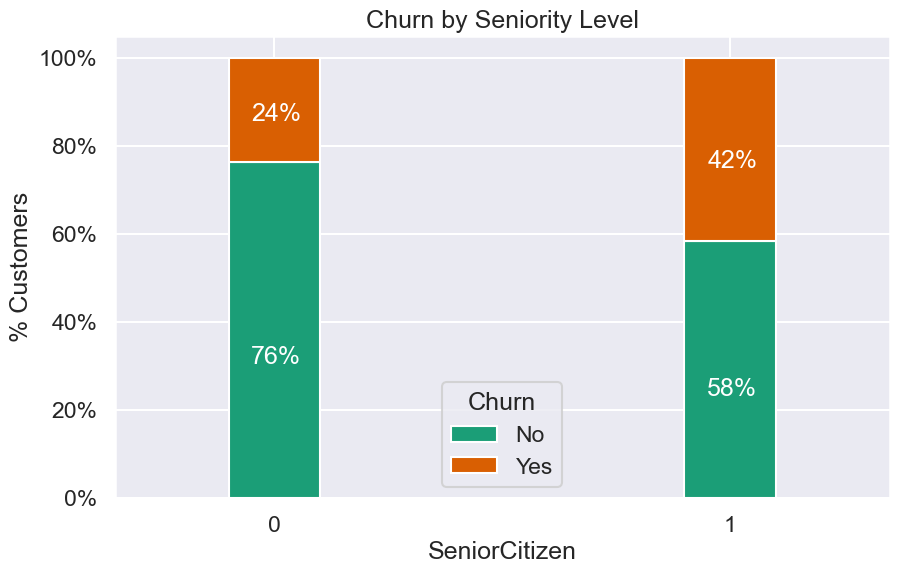

In [27]:
seniority_churn = data.groupby(['SeniorCitizen','Churn']).size().unstack()

ax = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(kind='bar', width = 0.2, stacked = True, rot = 0)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn by Seniority Level')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),color = 'white')   

##### From Above Plot, It Is Aparent That Senior Citizens Have Almost Double The Churn Rate Than Younger Population. To Explore The Reason, The Below Plot Was Drawn Which Clearly Shows Higher % Of Customers Churn When The Monthly Charges Are High.This Includes Sr Citizens Too.

C:\Users\rakes\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rakes\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution of monthly charges by churn')

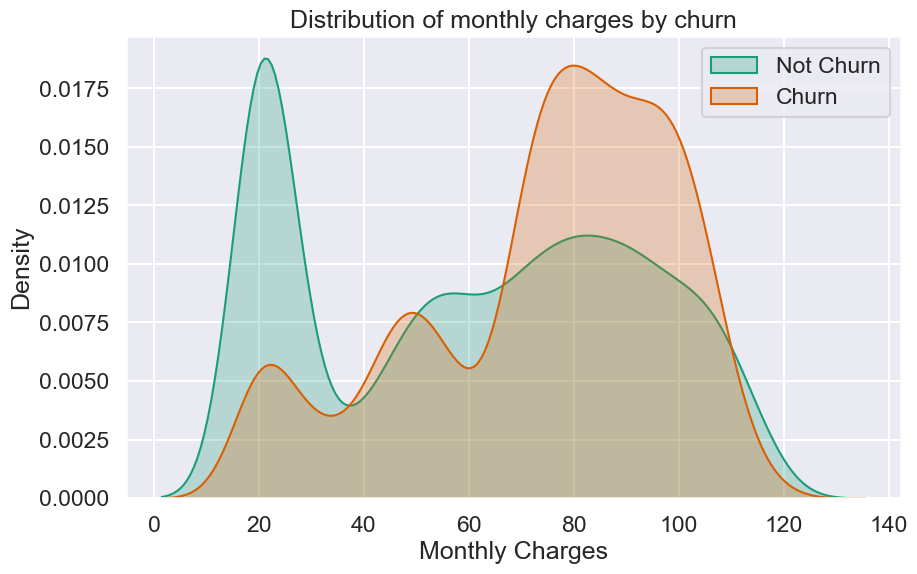

In [29]:
ax = sns.kdeplot(data.MonthlyCharges[(data["Churn"] == 'No')], fill=True)
ax = sns.kdeplot(data.MonthlyCharges[(data["Churn"] == 'Yes') ], ax =ax, fill= True)
ax.legend(["Not Churn","Churn"], loc='best')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

####  ASSUMPTIONS :-


##### For The Purpose Of This Analysis, 2 Assumptions Can Be Made:

1) For Each Customer That Left The Company, It Would Cost Telco Dollar 500.00 To Replace That Customer. 
Marketing, Ads, Campaigns, And Outreach — The Cost Adds Up.

2) Retain Each Customer Who Was Likely To Churn By Investing Dollar 100 In Them. This Could Be Through Discounts, 
Improving Service (Upping Their Internet Speed, For Example), Or Offering Perks.

##### Above Measures Are Part Of Diagnostic Analytic.

#### PREDICTIVE MODELLING :-

We will consider several different models to predict customer churn. To ensure we are not over-fitting to our data, 
we will split the 7,043 customer records into a training and test set, with the test set being 20% of the total records. 
It is important to scale the variables in regression so that all of them are within a range of 0 to 1.

Logistic regression requires there to be little or no multicollinearity among the independent variables. 
##### Therefore, as discussed in the begining, Total Charges will be removed.

In [30]:
df_dummies = df_dummies.drop("TotalCharges", axis=1) # Removing Total Charges To Avoid Multicolinearity.

# Using The Data Frame Where We Had Created Dummy Variables
y = df_dummies['Churn'].values
X = df_dummies.drop(columns = ['Churn'])

# Scaling All The Variables To A Range Of 0 To 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

#### METHODOLOGY :-
Our First Step Was To Split Our Data Into Training And Test Sets Using Train-test-split,
Which Would Allow Us To Cross-validate Our Results Later. We Also Stratified The Train-test-split, 
To Ensure That The Same Proportion Of Our Target Variable Was Found In Both Our Training And Test Sets.

#### SPILITING THE DATA :- 
X Is The Data With The Independent Variables, Y Is The Data With The Dependent Variable. 
The Test Size Variable Determines In Which Ratio The Data Will Be Split. 
It Is Quite Common To Do This In A 80 Training / 20 Test Ratio. Also Ned To Stratify The Train-test-split To Have A Balanced Split

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify=y)
print('length of X_train and x_test: ', len(X_train), len(X_test))
print('length of y_train and y_test: ', len(y_train), len(y_test))

length of X_train and x_test:  5625 1407
length of y_train and y_test:  5625 1407


#### LOGISTIC REGRESSION :- 

Using Machine Learning Algorithm And The Dependent Variable Here Churn 1 Or Churn 0 Is Categorical.
The Trained Model Can Be Used To Predict If A Customer Churned Or Not For The Test Dataset.
The Results Are Saved In “prediction_test” And Afterwards The Accuracy Score Is Measured And Printed.

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import metrics

model = LogisticRegression(solver='lbfgs', max_iter=1000)
result = model.fit(X_train, y_train)

prediction_test = model.predict(X_test)
y_pred = prediction_test # Prediction

# Print The Prediction Accuracy
print ("Prdiction:",metrics.accuracy_score(y_test, y_pred))

# Model Precision
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall
print("Recall:",metrics.recall_score(y_test, y_pred))

Prdiction: 0.8017057569296375
Precision: 0.6655052264808362
Recall: 0.5106951871657754


In [33]:
print('Intercept: ' + str(result.intercept_)) # Reporting The Intercept  
print('Regression: ' + str(result.coef_)) # Reporting The Co-efficients

Intercept: [-0.98796454]
Regression: [[ 0.18715203 -2.43931051 -0.00852662  0.01488481 -0.01485236  0.01063183
  -0.01059938  0.11062872 -0.11059627  0.11728073 -0.11724828 -0.17017432
   0.11728073  0.05292604 -0.45958971  0.56526352 -0.10564136  0.22501643
  -0.10564136 -0.11934262  0.11825689 -0.10564136 -0.01258308  0.04802402
  -0.10564136  0.05764979  0.2254066  -0.10564136 -0.11973279 -0.08884815
  -0.10564136  0.19452196 -0.08917765 -0.10564136  0.19485146  0.6214897
  -0.04373557 -0.57772168 -0.15446256  0.15449501 -0.03627493 -0.15979595
   0.24576997 -0.04966664]]


Confusion matrix
[[937  96]
 [183 191]]


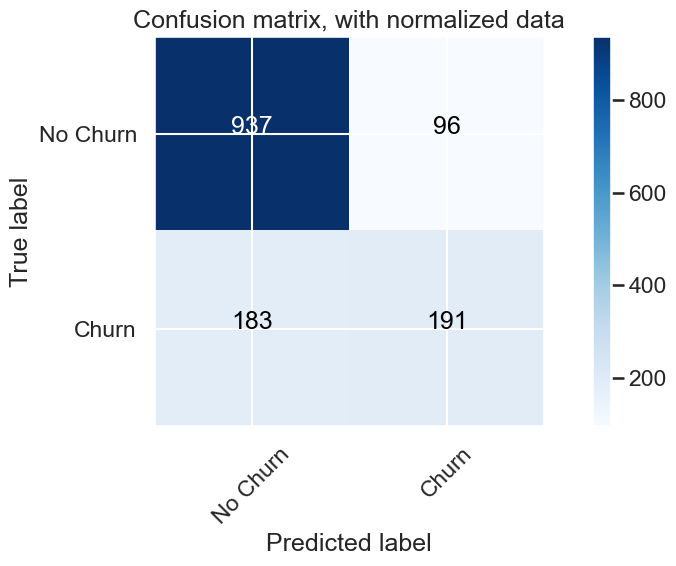

In [34]:
import itertools

# Evaluation Of Model - Confusion Matrix Plot
def plot_confusion_matrix(cm, classes, title ='Confusion matrix', normalize = False, cmap = plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute Confusion Matrix
cnf_matrix = confusion_matrix(y_test, prediction_test)
np.set_printoptions(precision=2)

# Plot Non-Normalized Confusion Matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['No Churn','Churn'],
                      title='Confusion matrix, with normalized data')

###### THE CLASSIFICATION RATE OF 80%, CONSIDERED AS GOOD ACCURACY. HOWEVER, IT MAY NOT BE THE RIGHT MEASURE AT TIMES, 
###### WHEN THE DATA IS SKEWED AND TARGET CLASS IS NOT BALANCED . SO, ADDITIONAL MEASURES LIKE PRECISION, RECALL, 
###### F SCORE (COMBINED METRIC) HAVE BEEN CONSIDERED.

However, The Precision (0.66%) And Recall (0.51%) For Predictions In The Positive Class (Churn) Are Relatively Low, 
Which Suggests The Data Set May Be Imbalanced.

The Confusion Matrix Clearly Shows The Model Performance Broken Down Into True Positives, True Negatives, False Positives, And False Negatives.

Precision Is The Ability Of A Classiifer Not To Label An Instance Positive That Is Actually Negative. 
For Each Class It Is Defined As As The Ratio Of True Positives To The Sum Of True And False Positives.

Recall Is The Ability Of A Classifier To Find All Positive Instances. For Each Class It Is Defined As The Ratio Of True Positives 
To The Sum Of True Positives And False Negatives.

The F1 Score Is A Weighted Harmonic Mean Of Precision And Recall Such That The Best Score Is 1.0 And The Worst Is 0.0. 
The End Goal For The Project Is To Know Every Single Customer Who Will Churn And How Much Insight Can Be Generated. Target Is To Focus On 
To Keep The Cutomers And How Much Company Could Spend To Keep Them Before Having Them As A Customer Turned Into A Loss. So Considering 
The Final Goal Is To Reduce Churn And Take The Right Preventing Actions In Time, Need To Check Which Independent Variables Have 
The Most Influence On The Predicted Outcome. Therefore Setting The Coefficients In The Model To Zero And Reviewing At The Weights Of Each Variable.

In [35]:
# F1 Score
f1 = (2*0.6577181208053692*0.5521126760563381)/(0.6577181208053692 + 0.5521126760563381)
print("F1 Score {:0.2f}".format(f1))

F1 Score 0.60


In [36]:
# To Get The Weights Of All The Variables

weights = pd.Series(model.coef_[0],index=X.columns.values)
weights.sort_values(ascending = False)

Contract_Month-to-month                    0.621490
InternetService_Fiber optic                0.565264
PaymentMethod_Electronic check             0.245770
TechSupport_No                             0.225407
OnlineSecurity_No                          0.225016
StreamingMovies_Yes                        0.194851
StreamingTV_Yes                            0.194522
SeniorCitizen                              0.187152
PaperlessBilling_Yes                       0.154495
OnlineBackup_No                            0.118257
PhoneService_No                            0.117281
MultipleLines_No phone service             0.117281
Dependents_No                              0.110629
DeviceProtection_Yes                       0.057650
MultipleLines_Yes                          0.052926
DeviceProtection_No                        0.048024
gender_Female                              0.014885
Partner_No                                 0.010632
MonthlyCharges                            -0.008527
Partner_Yes 

##### IT CAN BE OBSERVED THAT SOME VARIABLES HAVE A POSITIVE RELATION TO OUR PREDICTED VARIABLE (CHURN) AND SOME HAVE A NEGATIVE RELATION.


- “Contract_Month-To-Month”: The Positive Relation To Churn Means That Having This Type Of Contract Also Increases The 
   Probability Of A Customer To Churn. 
- “Contract_Two Year” Is In A Highly Negative Relation To The Predicted Variable, Which Means That Customers With This Type 
   Of Contract Are Very Unlikely To Churn. 


  Some Of The Variables Do Not Make Sense In The First Point.

  “Fiber_Optic” Is On Top Of This List In Terms Of A Positive Impact On Churn.
  While It Is Expected That Advantage Of Fiber Optic Makes A Customer Stay, But The Model Has A Different Story To Tell.
  Here It Is Important To Delve Deeper Into The Analysis And Get Some Context For The Data.

#### AUC (AREA UNDER THE CURVE) ROC (RECEIVER OPERATING CHARACTERISTICS) CURVE

AUCROC Tells How Much The Model Is Capable Of Distinguishing Between Churn And Nochurn. 
Higher The Auc, Better The Model Is At Predicting 0s As 0s And 1s As 1s. By Analogy, Higher The Auc, 
Better The Model Is At Distinguishing Between Churn And Nochurn

Note: you may need to restart the kernel to use updated packages.


C:\Users\rakes\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

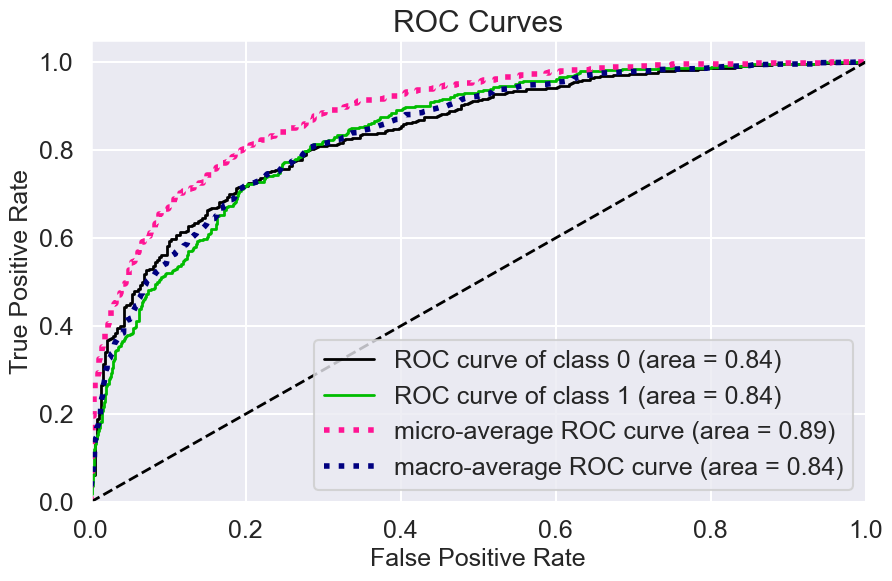

In [37]:
%pip install scikit-plot

import scikitplot as skplt        # To Make Things Easy
y_pred_proba = model.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_test, y_pred_proba)

Area Under Roc Curve (AUROC) Represents The Likelihood Of The Model Distinguishing Observations Between Two Classes. Auroc Gives A Single Measure Of How A Model’s True Positive Rate And False Positive Rate Change With Different Threshold Values. The Closer A Model’s Auroc Score Is To 1, The Better It Is. In The Above Plot, Both Are Above 0.5 However, Suggesting That Both Models Have The Ability To Distiguish Between Observations From Each Class.

            Tpr (True Positive Rate) = TP / TP + FN
Fraction Of Positive Examples Correctly Classified

            Fpr (False Positive Rate) = FP / FP + TN
Fraction Of Negative Examples Incorrectly Classified

Auc Is 0.84 Means There Is 84% Chance That Model Will Be Able To Distinguish Between Churn And Nochurn.

##### Handling Imbalanced Classes

In [38]:
df_dummies['Churn'].value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

The Class For Churn Is Only Around 30% Of The Total Population Of Samples. There Is A Real Risk Thatthe Model Trained On This Data May Only Make Too Many Predictions In Favour Of The Majority Class. To Balance The Data Set, Need To Randomly Duplicate Observations From The Minority Class.

In [39]:
from sklearn.utils import resample
 
data_majority = df_dummies[df_dummies['Churn']==0]
data_minority = df_dummies[df_dummies['Churn']==1]
 
data_minority_upsampled = resample(data_minority,
replace=True,
n_samples=5163, # Same Number Of Samples As Majority Class

random_state=1) # Set The Seed For Random Resampling

# Combine Resampled Results
data_upsampled = pd.concat([data_majority, data_minority_upsampled])
data_upsampled['Churn'].value_counts()

Churn
0    5163
1    5163
Name: count, dtype: int64

##### Now That We Have A 1:1 Ratio For Our Classes, Will Train Another Logistic Regression Model

In [40]:
from sklearn.metrics import classification_report

train, test = train_test_split(data_upsampled, test_size = 0.20)
 
train_y_upsampled = train['Churn']
test_y_upsampled = test['Churn']
 
train_x_upsampled = train
train_x_upsampled.pop('Churn')
test_x_upsampled = test
test_x_upsampled.pop('Churn')
 
logisticRegr_balanced = LogisticRegression(solver='lbfgs', max_iter=1000)
logisticRegr_balanced.fit(X=train_x_upsampled, y=train_y_upsampled)
 
test_y_pred_balanced = logisticRegr_balanced.predict(test_x_upsampled)

Note: you may need to restart the kernel to use updated packages.


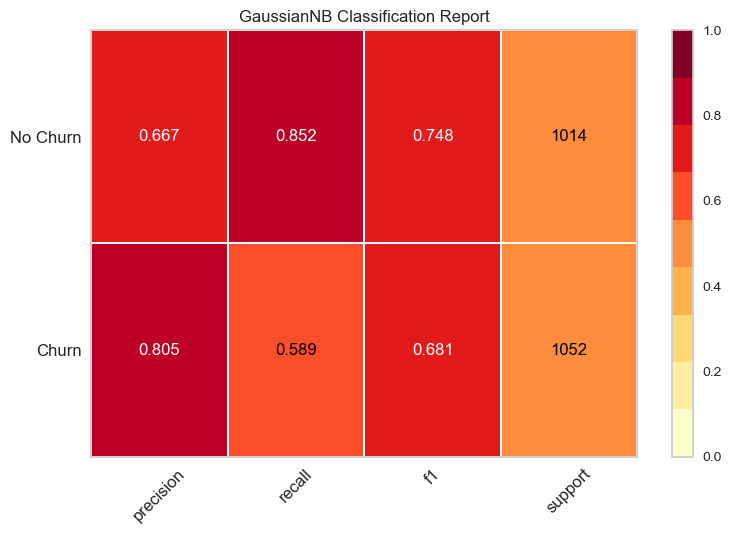

In [45]:
%pip install yellowbrick

from sklearn.naive_bayes import GaussianNB
from yellowbrick.classifier import ClassificationReport

classes=['Churn','No Churn']

# Instantiate The Classification Model And Visualizer
bayes = GaussianNB()
visualizer = ClassificationReport(bayes, classes=classes, support=True)

visualizer.fit(train_x_upsampled, train_y_upsampled)  # Fit The Visualizer And The Model
visualizer.score(test_x_upsampled, test_y_upsampled)  # Evaluate The Model On The Test Data
g = visualizer.poof()             # Draw/Show/Poof The Data

##### From Above Output It Can Be See That, The Overall Accuracy Of The Model Has Decreased, But The Precision And Recall Scores For Predicting A Churn Have Improved.

Support Is The Number Of Actual Occurrences Of The Class In The Specified Dataset. Imbalanced Support In The Training Data May Indicate Structural Weaknesses In The Reported Scores Of The Classifier And Could Indicate The Need For Stratified Sampling Or Rebalancing. Support Doesn’t Change Between Models But Instead Diagnoses The Evaluation Process.

The Model’s Precision For No Churn 69%) Is Lower Than Churn (82%) But Precision Is Higher (86%) Than Churn (62%). The F1-score For The Nochurn Is Higher (76.6%), While For The Churn Is Is 71%. The Overall Accuracy Of The Model Has Decreased, But The Precision And Recall Scores For Predicting A Churn Have Improved In This Model.

In [41]:
from sklearn.metrics import roc_auc_score
 

# Get Class Probabilities For Both Models
test_y_prob = model.predict_proba(X_test)
test_y_prob_balanced = model.predict_proba(test_x_upsampled)


# We Only Need The Probabilities For The Positive Class
test_y_prob = [p[1] for p in test_y_prob]
test_y_prob_balanced = [p[1] for p in test_y_prob_balanced]
 
print('Unbalanced model AUROC: ' + str(roc_auc_score(y_test, test_y_prob)))
print('Balanced model AUROC: ' + str(roc_auc_score(test_y_upsampled, test_y_prob_balanced)))

Unbalanced model AUROC: 0.8408094382697195
Balanced model AUROC: 0.761691089981208


##### Auroc Scores Are >7.0 In Both The Models. Unbalanced Model Is >8.0. This Suggests That Both Models Have The Ability To Distiguish Between Observations From Each Class.

##### K-fold Cross Validation

10-fold Cross-validation Is Used To Estimate The Skill Of Model. On Each Fold, It Splits The Data Into A Training Set And A Testing Set Fits Itself On The Training Set And Evaluates Itself On The Testing Set Using The Concordance Measure By Default.
.


In [42]:
from sklearn.model_selection import cross_val_score

# Evaluate The Model Using 10-fold Cross-Validation
scores = cross_val_score(result, X_train, y_train, scoring='accuracy', cv=10)
print (' 10 fold cross-validation scores: ' ,scores)
print('Mean of scores: ', scores.mean())

 10 fold cross-validation scores:  [0.79 0.81 0.81 0.81 0.79 0.77 0.83 0.8  0.8  0.82]
Mean of scores:  0.8033801508188846


##### Model Has Provided 80% Accuracy So Far After All Necessary Validation And Cross Validation.

## Survival Analysis
Logistic Regression Is Assigning A Probability To Each Observation That Describes How Likely It Is To Belong To The Positive Class.

In Any Large Enough Group Of Customers Like Telecom There Are Going To Be People Who Have The Same Attributes / Features. Some Of Those Will Churn And Some Of Them Won’t, And What Telecom Company Ideally Like To Know Is The Probability Of Churn For Each Group. This Is What Logistic Regression Provides. But It Is Not Clear What Time Scale It Is Predicting For. Therefore, Survival Analysis Was Conducted For This Purpose.

#### Kaplan-meier And Cox Proportional Hazards Model
Kapalan Is Fully Parametric And The Cox Ph Model Is Semi-parametric.

Kapalan-meier Kaplan-meier Need Specification Of The Distribution Of The Underlying Hazard. Coxph Analyses The Covariates (Features) Of A Dataset With Regards To How Long A Customer Survives. It Describes How Each Feature Proportionally Increases Risk Over The Baseline Survival Rate For A Cohort.

#### Mathematical Intuition
T Is The Time From Customer’s(A Randomly Selected Customer) Subscription To The Customer Churn. It Is A Continuous Random Variable, Therefore It Can Take Any Real Value.

T Has A Probability Density Function F(T) , And Cumulative Distribution Function F(T) . Pdf : F(T) Cdf : F(T)

As Per The Definition Of Cdf From A Given Pdf, We Can Define Cdf As: F(T) = P (T< T) Here , F(T) Gives Us The Probability That The Event Has Occurred By Duration T.

Survival Function: S(T) = 1 - F(T)= P(T ≥t)

S(T) Gives Us The Probability That The Event Has Not Occurred By The Time T.

Hazard Function -h(T) : Along With The Survival Function, We Are Also Interested In The Rate At Which Event Is Taking Place, Out Of The Surviving Population At Any Given Time T. H(T) = [( S(T) -s(T + Dt) )/dt] / S(T) Limit Dt → 0

Here We Have Each Customer’s Tenure When They Churned (The Event Time T) And The Customer’s Gender, Monthlycharges, Dependants, Partner, Phoneservice Etc. The Other Variables Are The Covariates In This Example. We Are Interested In How These Covariates Impacts The Survival Probability Function.

In Such Cases, It Is The Conditional Survival Function S(T|x) = P(T > T|x). Here X Denotes The Covariates. In Our Example, We Are Interested In S(Tenure > T|(Gender, Monthlycharges, Dependants, Partner, Phoneservice Etc)).

The Cox Model Assumes That The Covariates Have A Linear Multiplication Eﬀect On The Hazard Function And The Eﬀect Stays The Same Across Time.

From Its Formulation Above We Can See That It Has Two Parts. Lets Understand Each Part

Instantaneous Rate Of Event: ( S(T) -s(T + Dt) )/dt This Can Also Be Seen As The Slope At Any Point T Of The Survival Curve, Or The Rate Of Dying At Any Time T.

Also Lets Assume The Total Population As P.

Here, S(T) -s(T + Dt) , This Difference Gives Proportion Of People Died In Time Dt, Out Of The People Who Survived At Time T.

- Number Of Customers Surviving At T Is S(T)*p  
- Number Of Customers Surviving At T+dt Is S(T+dt)*p. 
- Number Of Customers Left During Dt Is (S(T) -s(T + Dt))*p. 
- Instantaneous Rate Of Customers Leaving At Time T Is (S(T) -s(T + Dt))*p/dt.
Proportion Surviving At Time T: S(T); We Also Know The Surviving Population At Time T, S(T)*p.

Thus Dividing Number Of Customers Left In Time Dt, By The Number Of Customers Survived At Any Time T, Gives Us The Hazard Function As Measure Of Risk Of The Customer Leaving, Which Survived At The Time T.

The Hazard Function Is The Probability Of Failure In An Inﬁnitesimally Small Time Period Between (T) And (T+ Dt) Given That The Subject Has Survived Up Till Time T. In This Sense, The Hazard Is A Measure Of Risk: The Greater The Hazard Between Times T1 And T2, The Greater The Risk Of Failure In This Time Interval.

We Have : H(T) = F(T)/s(T) ; Since We Know That ( S(T) -s(T + Dt) )/dt = F(T)

This Is A Very Important Derivation. The Survival Function Can Be Derived From Hazard Function And Vice Versa.

##### For Each Customer, Two Important Data Points For Survival Analysis Are Required
‘tenure’: How Long They Have Been A Customer When The Data Is Observed ‘churn’: Whether Or Not The Customer Left When The Data Was Observed

In [43]:
# Transform Tenure And Churn Features
data['tenure'] = data['tenure'].astype(float)
data['Churn'] = data['Churn'] == 'Yes'
data.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No     1.0           No   
1  5575-GNVDE    Male              0      No         No    34.0          Yes   
2  3668-QPYBK    Male              0      No         No     2.0          Yes   
3  7795-CFOCW    Male              0      No         No    45.0           No   
4  9237-HQITU  Female              0      No         No     2.0          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges  Churn  
0           Electronic check          29.85         29.85  False  
1               Mailed check          56.95        1889.5  False  
2               Mailed check          53.85        108.15   True  
3  Bank transfer (automatic)          42.30       1840.75  False  
4           Electronic check          70.70        151.65   True  

[5 rows x 21 columns]

#### Kaplan-meier

In [44]:
%pip install lifelines

import lifelines
from lifelines import KaplanMeierFitter

# Fitting Kmf To Churn Data
t = data['tenure']
churn = data['Churn']
kmf = lifelines.KaplanMeierFitter()
kmf.fit(t, churn, label='Estimate for Average Customer')

Note: you may need to restart the kernel to use updated packages.


<lifelines.KaplanMeierFitter:"Estimate for Average Customer", fitted with 7043 total observations, 5174 right-censored observations>

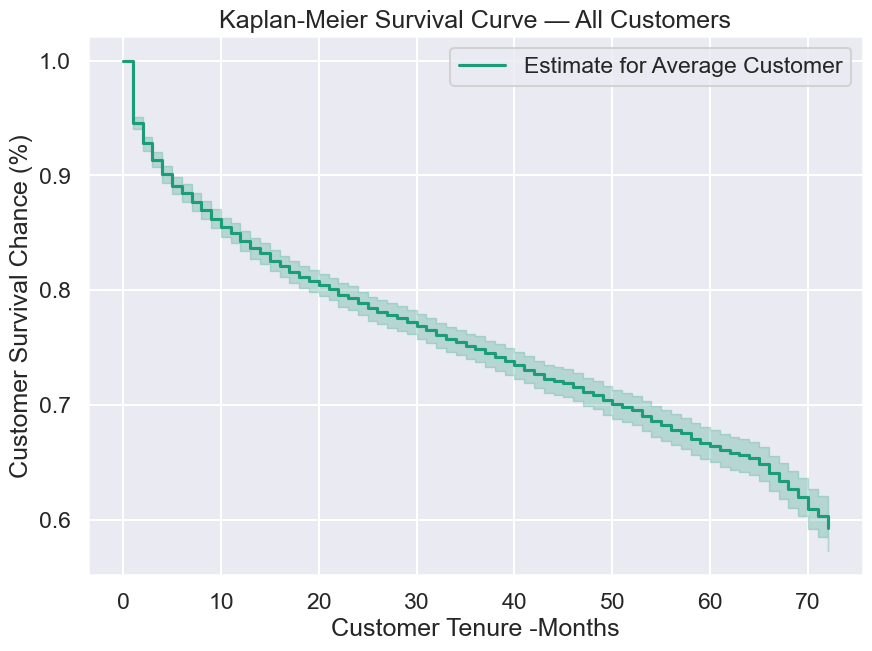

In [45]:
# Plotting Kmf Curve
fig, ax = plt.subplots(figsize=(10,7))
kmf.plot(ax=ax)
ax.set_title('Kaplan-Meier Survival Curve — All Customers')
ax.set_xlabel('Customer Tenure -Months')
ax.set_ylabel('Customer Survival Chance (%)')
plt.show()

The Above Plot Provides Some Basic Intuition About The Customers. The Expectation Is That, Churn Is Relatively Low. From The Plot, Withing 1-2 Years, Company Retained Almost 80-90% Of Their Customers. But There Is Steady Decline And After Over 70 Months, The Company Is Able To Retain Almost 60% Of Their Customers. This Input Is Quite Useful For The Telecom Company To Undertand The Trend And Business Forecast.

To Examine The Effects Of Different Variables, The Cox Proportional Hazards Model Is Used.

This Is A Survival Regression Model. ‘hazards’ Can Be Thought Of Something That Would Increase/decrease Chances Of Customer Retention. A Hazard May Be The Type Of Contract A Customer Has. Customers With Multi-year Contracts Probably Cancel Less Frequently Than Those With Month-to-month Contracts. One Restriction Is The Model Assumes A Constant Ratio Of Hazards Over Time Across Groups.

#### Applying Cox Proportional Hazard Model
Cox Proposed Fitting The Coefficients Of The Hazard Function Using A Partial Likelihood Method. The Advantage Of Cox Proportional Hazards Regression Is That The Survival Models Can Be Fitted Without The Distribution Assumption.

The Time To Event For A Customer In The Dataset Is Very Important For The Survival Curves At The Aggregate Level; However, In Real Life Situations Along With The Event Data The Covariates (Features) Of That Individual Will Be Pesent. Therefore, It Is Very Important To Know About The Impact Of Covariates On The Survival Curve. This Would Help In Predicting The Survival Probability Of A Customer, Ifthe Associated Covariates Values Are Known.

The Data Has Each Customer’s Tenure When They Churned (The Event Time T) And The Customer’s Gender, Monthlycharges, Dependants, Partner, Phoneservice Etc. The Other Variables Are The Covariates Here. It Would Be Interesting To Know How These Covariates Impacts The Survival Probability Function.

In Such Cases, It Is The Conditional Survival Function S(T|x) = P(T > T|x). Here X Denotes The Covariates. We Are Interested In S(Tenure > T|(Gender, Monthlycharges, Dependants, Partner, Phoneservice Etc)).

In [46]:
a = pd.read_csv('Telco_Customer_Churn.csv')
a.head(2)

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   

      PaymentMethod MonthlyCharges  TotalCharges Churn  
0  Electronic check          29.85         29.85    No  
1      Mailed check          56.95        1889.5    No  

[2 rows x 21 columns]

In [47]:
dummies = pd.get_dummies(a[[
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn'
]])
a = dummies.join(a[['MonthlyCharges', 'TotalCharges']])

In [48]:
a['TotalCharges'] = a[['TotalCharges']].replace([' '], '0')
a['TotalCharges'] = pd.to_numeric(a['TotalCharges'])

In [49]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 47 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7043 non-null   int64  
 1   tenure                                   7043 non-null   int64  
 2   gender_Female                            7043 non-null   bool   
 3   gender_Male                              7043 non-null   bool   
 4   Partner_No                               7043 non-null   bool   
 5   Partner_Yes                              7043 non-null   bool   
 6   Dependents_No                            7043 non-null   bool   
 7   Dependents_Yes                           7043 non-null   bool   
 8   PhoneService_No                          7043 non-null   bool   
 9   PhoneService_Yes                         7043 non-null   bool   
 10  MultipleLines_No                         7043 no

In [50]:
a = a[['SeniorCitizen',
       'tenure',
       'gender_Female',
       'Partner_Yes',
       'Dependents_Yes',
       'PhoneService_Yes',
       'MultipleLines_Yes',
       'InternetService_DSL',
       'InternetService_Fiber optic',
       'OnlineSecurity_Yes',
       'OnlineBackup_Yes',
       'DeviceProtection_Yes',
       'TechSupport_Yes',
       'StreamingTV_Yes',
       'StreamingMovies_Yes',
       'Contract_One year',
       'Contract_Two year',
       'PaperlessBilling_Yes',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check',
       'MonthlyCharges',
       'TotalCharges',
       'Churn_Yes']]

a.head()

SeniorCitizen  tenure  gender_Female  Partner_Yes  Dependents_Yes  \
0              0       1           True         True           False   
1              0      34          False        False           False   
2              0       2          False        False           False   
3              0      45          False        False           False   
4              0       2           True        False           False   

   PhoneService_Yes  MultipleLines_Yes  InternetService_DSL  \
0             False              False                 True   
1              True              False                 True   
2              True              False                 True   
3             False              False                 True   
4              True              False                False   

   InternetService_Fiber optic  OnlineSecurity_Yes  ...  StreamingMovies_Yes  \
0                        False               False  ...                False   
1                        False                True  ...                False   
2                        False                True  ...                False   
3                        False                True  ...                False   
4                         True               False  ...                False   

   Contract_One year  Contract_Two year  PaperlessBilling_Yes  \
0              False              False                  True   
1               True              False                 False   
2              False              False                  True   
3               True              False                 False   
4              False              False                  True   

   PaymentMethod_Bank transfer (automatic)  \
0                                    False   
1                                    False   
2                                    False   
3                                     True   
4                                    False   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                  False                            True   
1                                  False                           False   
2                                  False                           False   
3                                  False                           False   
4                                  False                            True   

   MonthlyCharges  TotalCharges  Churn_Yes  
0           29.85         29.85      False  
1           56.95       1889.50      False  
2           53.85        108.15       True  
3           42.30       1840.75      False  
4           70.70        151.65       True  

[5 rows x 24 columns]

##### Head Of The Dummied And Reduced Dataset; Gender_male Has Disappeared, As Has Partner_no, Dependents_no And So On. For Any Matrix-based Regression , Singular Matrices Always Throw An Error In Python . Therefore, Had To Throw One Of The Colulmns Away While Creating Dummy Variables. We Will Still Be Able To Infer The Missing Category From The Remaining Variables.
For Coxph Test, Churn Column Is The Event Observation In The Single Dataset That’s Passed To The Fit Call. Need To Split Dataset In Two (Train And Test).

In [51]:
from lifelines import CoxPHFitter
from scipy.special import logsumexp

cph_train, cph_test = train_test_split(a, test_size=0.2)

# Using Cox Proportional Hazards Model
cph = CoxPHFitter()   # Instantiate The Class To Create A Cph Object
cph.fit(cph_train, duration_col='tenure', event_col='Churn_Yes', robust=True)   # Fit The Data To Train The Model
cph.print_summary(model="telecom churn prediction variables", decimals=3)    # Have A Look At The Significance Of The Features

<lifelines.CoxPHFitter: fitted with 5634 total observations, 4140 right-censored observations>
             duration col = 'tenure'
                event col = 'Churn_Yes'
          robust variance = True
      baseline estimation = breslow
   number of observations = 5634
number of events observed = 1494
   partial log-likelihood = -9826.139
         time fit was run = 2024-07-16 10:19:27 UTC
                    model = telecom churn prediction variables

---
                                          coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                                                 
SeniorCitizen                            0.038     1.039     0.056          -0.072           0.148               0.931               1.160
gender_Female                            0.084     1.088     0.047          -0.008           0.177               0.992               1.194
Partner_Yes                             -0.185     0.831     0.054          -0.291          -0.079               0.747               0.924
Dependents_Yes                          -0.115     0.892     0.075          -0.261           0.032               0.770               1.032
PhoneService_Yes                         0.258     1.294     0.486          -0.695           1.211               0.499               3.356
MultipleLines_Yes                       -0.028     0.973     0.125          -0.273           0.218               0.761               1.243
InternetService_DSL                      1.637     5.140     0.642           0.379           2.895               1.462              18.080
InternetService_Fiber optic              2.161     8.678     1.192          -0.176           4.498               0.839              89.799
OnlineSecurity_Yes                      -0.294     0.745     0.133          -0.555          -0.033               0.574               0.967
OnlineBackup_Yes                        -0.159     0.853     0.128          -0.410           0.091               0.664               1.095
DeviceProtection_Yes                    -0.051     0.950     0.127          -0.301           0.198               0.740               1.219
TechSupport_Yes                         -0.194     0.824     0.131          -0.450           0.063               0.637               1.065
StreamingTV_Yes                          0.061     1.063     0.236          -0.402           0.525               0.669               1.690
StreamingMovies_Yes                      0.066     1.069     0.235          -0.394           0.527               0.674               1.694
Contract_One year                       -1.275     0.279     0.135          -1.538          -1.011               0.215               0.364
Contract_Two year                       -3.679     0.025     0.306          -4.278          -3.080               0.014               0.046
PaperlessBilling_Yes                     0.145     1.156     0.060           0.027           0.264               1.027               1.302
PaymentMethod_Bank transfer (automatic) -0.590     0.554     0.095          -0.776          -0.405               0.460               0.667
PaymentMethod_Credit card (automatic)   -0.585     0.557     0.095          -0.772          -0.398               0.462               0.672
PaymentMethod_Electronic check          -0.160     0.852     0.074          -0.305          -0.015               0.737               0.985
MonthlyCharges                           0.034     1.034     0.023          -0.011           0.079               0.989               1.082
TotalCharges                            -0.002     0.998     0.000          -0.002          -0.001               0.998               0.999

                                         cmp to       z       p  -log2(p)
covariate                                                                
SeniorCitizen                             0.000   

##### Observations Can Come With Weights, As Well Interms Of Weights May Be Integer Values Representing Some Commonly Occurring Observation, Or They May Be Float Values Representing Some Sampling Weights (E.g. Inverse Probability Weights). When Using Sampling Weights, It's Correct To Also Change The Standard Error Calculations. So, Used Robust Fit Method.

#### The Summary Statistics Above Indicates The Significance Of The Covariates In Predicting The Churn Risk.
- In The Above Regression, The Key Output Is Exp(Coef). This Is Interpreted As The Scaling Of Hazard Risk For Each Additional Unit Of The Variable, 1.00 Being Neutral.
- Customers Whose Paymentmethod_electronic Check Are More Likely To Churn; Likewise, Paperless Billing Customers Are More Likely To Cancel Their Servie (1.12 Times). Below Plot Displays A Clear Image Of Expected Churn Placed In Order From High To Low Risk.
- Internet Service (Dsl & Fiber), Contract ( 1& 2 Years), Payment Method And Total Charges Play Significant Role In Predicting The Churn, Whereas All The Other Covariates Are Not Significant.
- Interesting Point To Note Here Is That , The Β (Coef ) Values In Case Of Covariates Totalcharges Is Zero (~-0.00), But Still The Totalcharges Plays A Significant Role In Predicting Churn. The Reason Is That The Monthlycharges Is Continuous Value And It Can Vary From The Order Of Tens, Hundreds To Thousands, When Multiplied By The Small Coef (β=-0.01), It Becomes Significant.
- We Can See The Number Of Observations Listed As N=5634, Number Of Events (Churned Customers)=1482 Coefficients Of The Model Are Very Important And They Tell Us How Each Feature Increases Risk. The Positive Number That Attribute Makes A Customer More Likely To Churn, And Negative Means Customers Are Less Likely To Churn.
- We Get The Concordance (0.929 = 0.93). This Is An Assessment Of How Internally Consistent The Model Is. Concordance Of 0.93 Suggests A Good Model. The Concordance Score Evaluates The Relative Rankings Of Subject's Event Times I.e. We Can Multiple By A Positive Constant, Or Add A Constant, And The Rankings Won't Change). A Model Maximized For Concordance- Index Will Give Good Predicted Rankings.

Text(0.5, 1.0, 'Coefficients of Confidence Intervals')

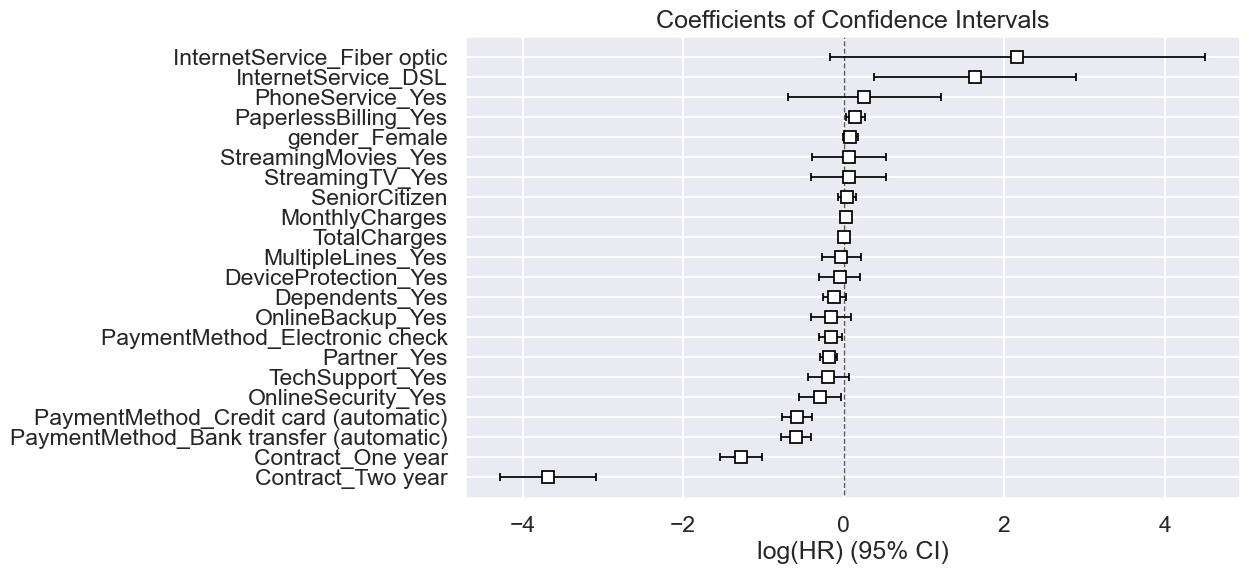

In [52]:
cph.plot()
plt.title('Coefficients of Confidence Intervals')

# So Here We Are Looking At The Different Survival Curves For Customers Whose Totalcharges Are Near Zero Compared To Those 
# Whose Totalcharges Are Closer To 4000.

##### Testing The Proportional Hazard Assumptions
The Proportional Hazard Assumption Is That All Customers Have The Same Hazard Function, But A Unique Scaling Factor Infront. So The Shape Of The Hazard Function Is The Same For All Customers, And Only A Scalar Infront Changes.

            hi(t) = (ai)h(t)
At The Core Of The Assumption Is That Ai Is Not Time Varying, That Is, Ai(T) = Ai. Further More, If We Take The Ratio Of This With The Hazard,

            hi(t) / hj(t) = (ai)h(t) / (aj)h(t) = (ai) / (aj)
Is Constant For  All T.


   Bootstrapping lowess lines. May take a moment...

The ``p_value_threshold`` is set at 0.05. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 5634 total observations, 4140 right-censored observations>
         test_name = proportional_hazard_test

---
                                              test_statistic      p  -log2(p)
Contract_One year                       km             78.05 <0.005     59.79
                                        rank           65.68 <0.005     50.75
Contract_Two year                       km             67.47 <0.005     52.05
                                        rank           55.60 <0.005     43.36
Dependents_Yes                          km              1.58   0.21      2.26
                                        rank            1.40   0.24      2.08
DeviceProtection_Yes                    km              0.38   0.54      0.90
                                        rank            1.29   0.26      1.97
InternetService_DSL                     km              6.06   0.01      6.18
                                        rank            9.43 <0.005      8.87
InternetService_Fiber optic             km              3.41   0.06      3.95
                                        rank            5.84   0.02      6.00
MonthlyCharges                          km              0.08   0.77      0.37
                                        rank            0.00   0.99      0.02
MultipleLines_Yes                       km              0.70   0.40      1.31
                                        rank            3.06   0.08      3.64
OnlineBackup_Yes                        km              0.78   0.38      1.41
                                        rank            2.01   0.16      2.68
OnlineSecurity_Yes                      km              1.01   0.31      1.67
                                        rank            2.99   0.08      3.58
PaperlessBilling_Yes                    km              1.30   0.25      1.98
                                        rank            1.30   0.25      1.97
Partner_Yes                             km              5.91   0.02      6.05
                                        rank            8.00 <0.005      7.74
PaymentMethod_Bank transfer (automatic) km              0.25   0.62      0.69
                                        rank            0.24   0.62      0.68
PaymentMethod_Credit card (automatic)   km              1.53   0.22      2.21
                                        rank            3.80   0.05      4.28
PaymentMethod_Electronic check          km              0.26   0.61      0.72
                                        rank            1.26   0.26      1.93
PhoneService_Yes                        km              1.62   0.20      2.30
                                        rank            3.23   0.07      3.79
SeniorCitizen                           km              5.36   0.02      5.60
                                        rank            3.76   0.05      4.25
StreamingMovies_Yes                     km              0.85   0.36      1.48
                                        rank            2.06   0.15      2.73
StreamingTV_Yes                         km              1.10   0.29      1.76
                                        rank            2.48   0.12      3.12
TechSupport_Yes                         km              1.82   0.18      2.50
                                        rank            3.35   0.07      3.89
TotalCharges                            km             84.49 <0.005     64.49
                                        rank           12.88 <0.005     11.56
gender_Female                           km              0.04   0.85      0.23
                                        rank            0.00   0.99      0.01



1. Variable 'SeniorCitizen' failed the non-proportional test: p-value is 0.0206.

   Advice: with so few unique values (only 2), you can include `strata=['SeniorCitizen', ...]` in
the call in `.fit`. See documentation in link [E] below.

   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


2. Variable 'Partner_Yes' failed the non-proportional test: p-value is 0.0047.

   Advice: with so few unique values (only 2), you can include `strata=['Partner_Yes', ...]` in the
call in `.fit`. See documentation in link [E] below.

   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


3. Variable 'InternetService_DSL' failed the non-proportional test: p-value is 0.0021.

   Advice: with so few unique values (only 2), you can include `strata=['InternetService_DSL', ...]`
in the call i

C:\Users\rakes\anaconda3\Lib\site-packages\lifelines\fitters\mixins.py:123: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure()



   Bootstrapping lowess lines. May take a moment...


8. Variable 'TotalCharges' failed the non-proportional test: p-value is <5e-05.

   Advice 1: the functional form of the variable 'TotalCharges' might be incorrect. That is, there
may be non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on how to specify a functional form.

   Advice 2: try binning the variable 'TotalCharges' using pd.cut, and then specify it in
`strata=['TotalCharges', ...]` in the call in `.fit`. See documentation in link [B] below.

   Advice 3: try adding an interaction term with your time variable. See documentation in link [C]
below.


---
[A]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html
[B]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Bin-variable-and-stratify-on-it
[C]  https://lifelines.readthedocs.io

[[<Axes: xlabel='rank-transformed time\n(p=0.0525)'>,
  <Axes: xlabel='km-transformed time\n(p=0.0206)'>],
 [<Axes: xlabel='rank-transformed time\n(p=0.9900)'>,
  <Axes: xlabel='km-transformed time\n(p=0.8509)'>],
 [<Axes: xlabel='rank-transformed time\n(p=0.0047)'>,
  <Axes: xlabel='km-transformed time\n(p=0.0151)'>],
 [<Axes: xlabel='rank-transformed time\n(p=0.2371)'>,
  <Axes: xlabel='km-transformed time\n(p=0.2089)'>],
 [<Axes: xlabel='rank-transformed time\n(p=0.0724)'>,
  <Axes: xlabel='km-transformed time\n(p=0.2035)'>],
 [<Axes: xlabel='rank-transformed time\n(p=0.0805)'>,
  <Axes: xlabel='km-transformed time\n(p=0.4036)'>],
 [<Axes: xlabel='rank-transformed time\n(p=0.0021)'>,
  <Axes: xlabel='km-transformed time\n(p=0.0138)'>],
 [<Axes: xlabel='rank-transformed time\n(p=0.0157)'>,
  <Axes: xlabel='km-transformed time\n(p=0.0649)'>],
 [<Axes: xlabel='rank-transformed time\n(p=0.0835)'>,
  <Axes: xlabel='km-transformed time\n(p=0.3142)'>],
 [<Axes: xlabel='rank-transformed tim

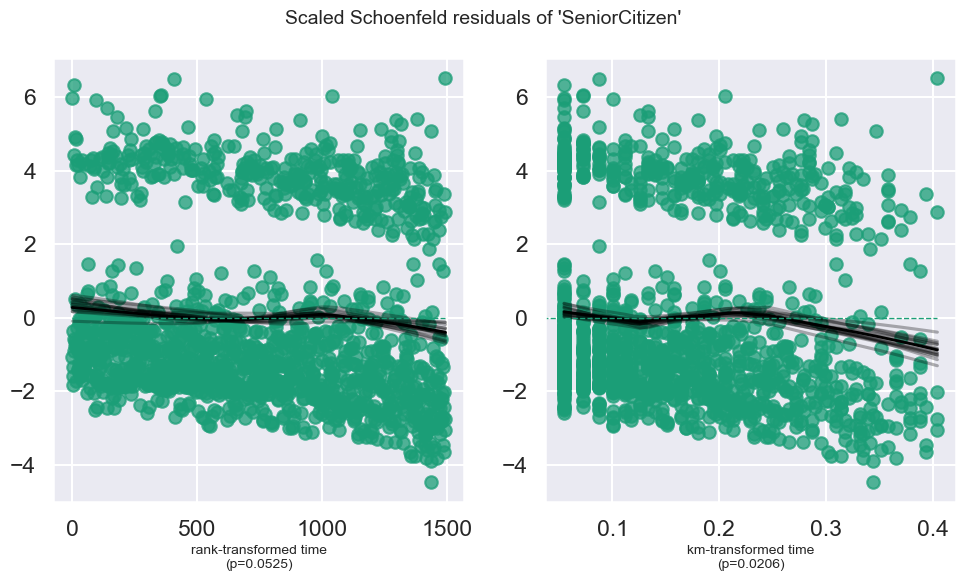

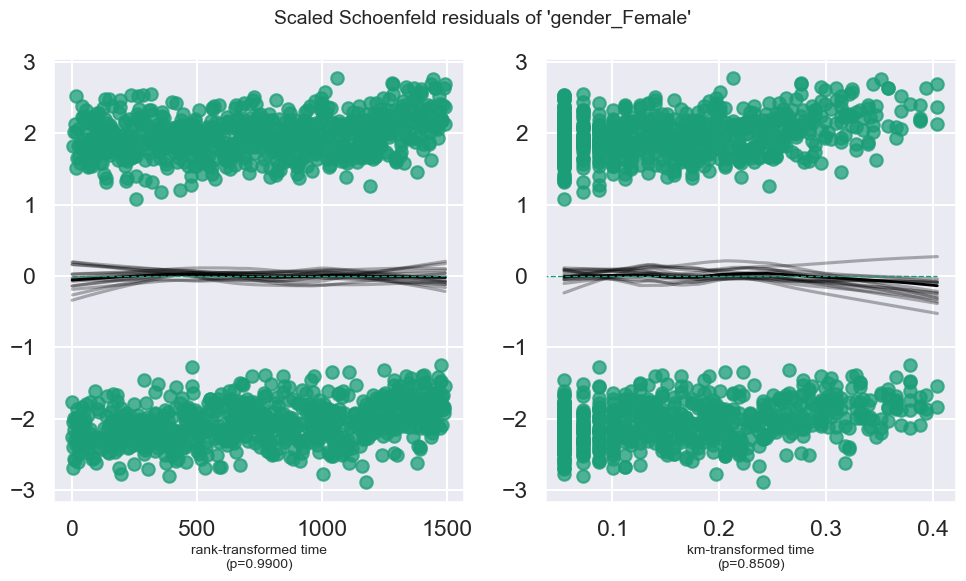

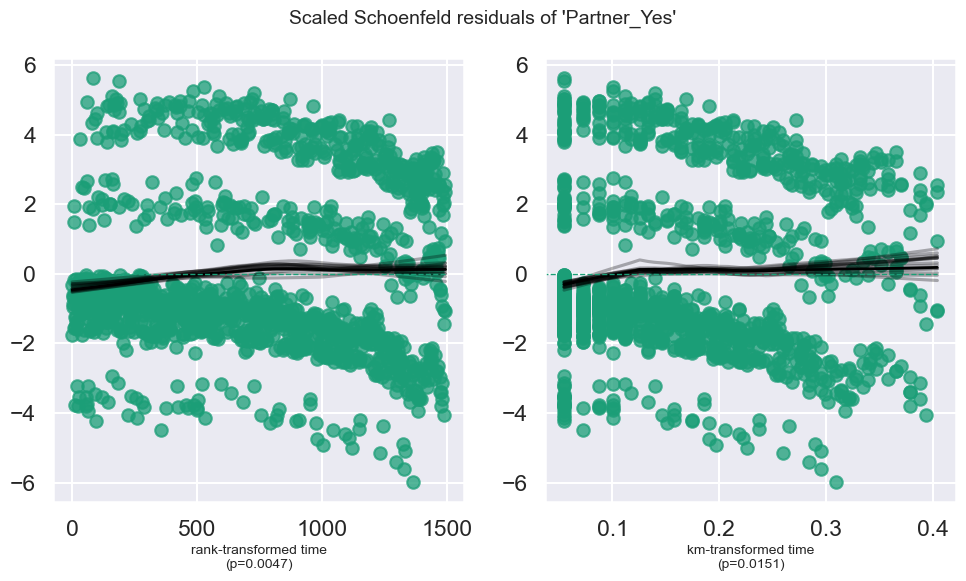

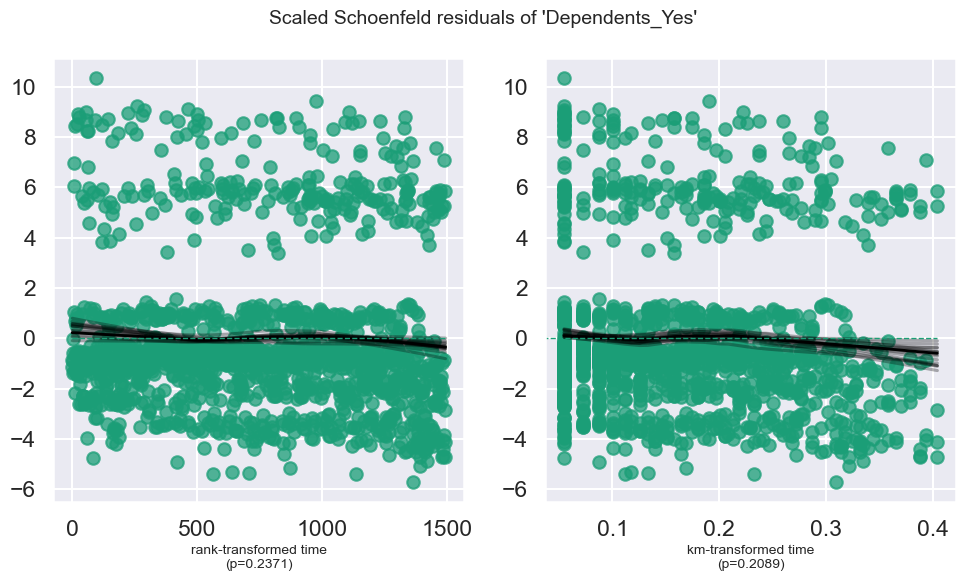

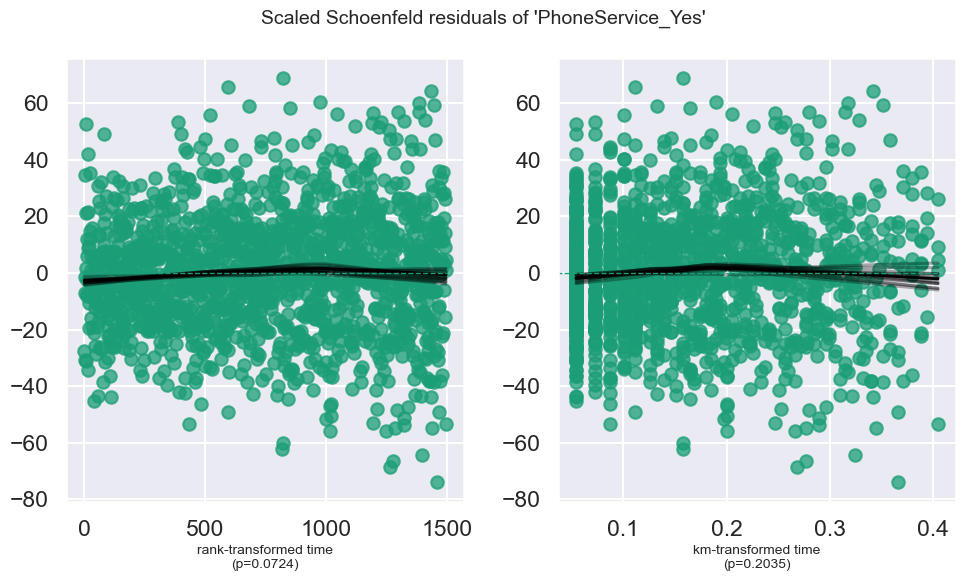

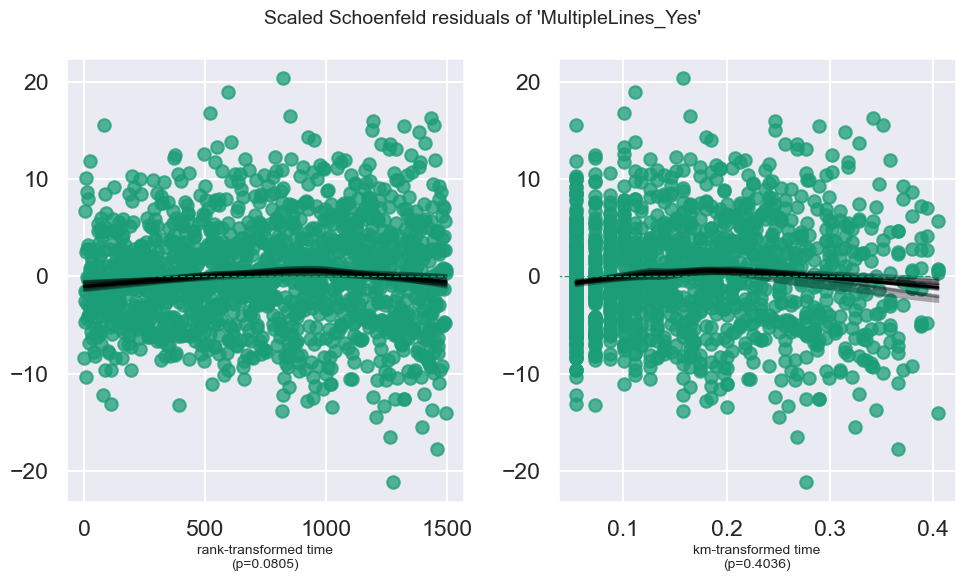

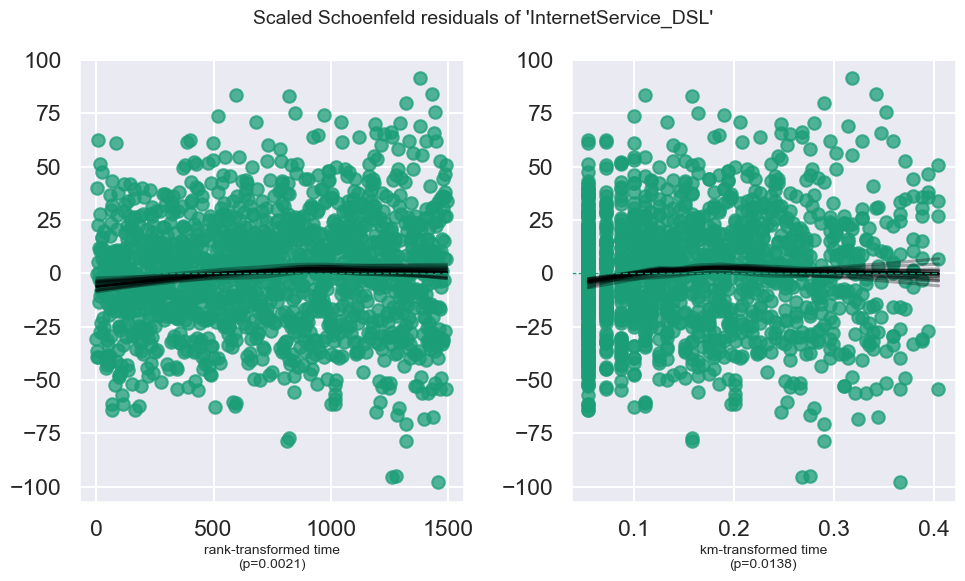

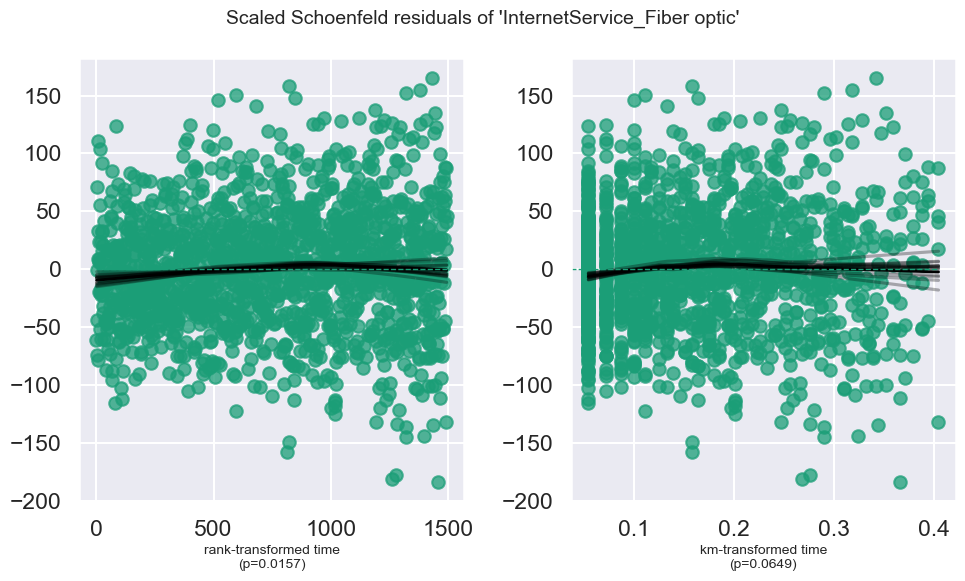

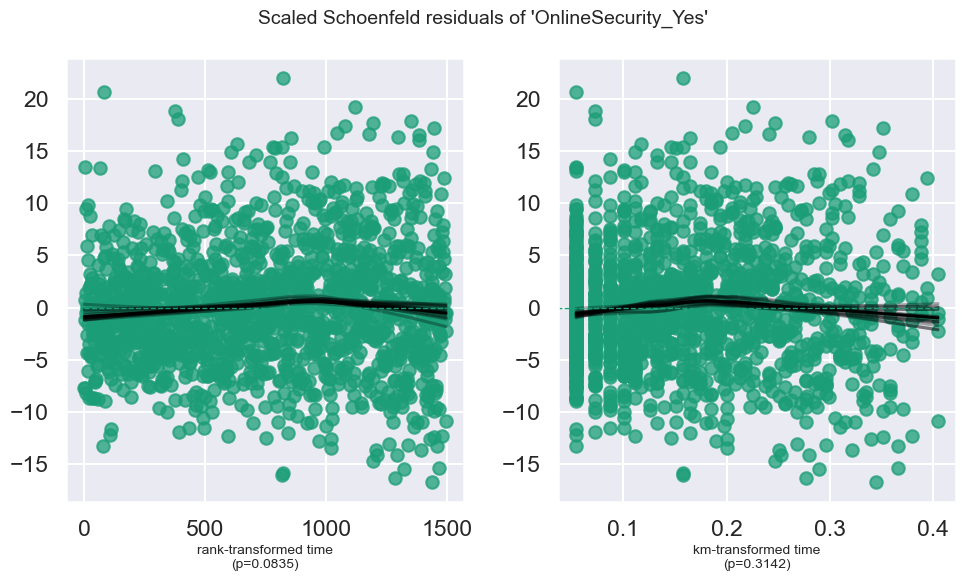

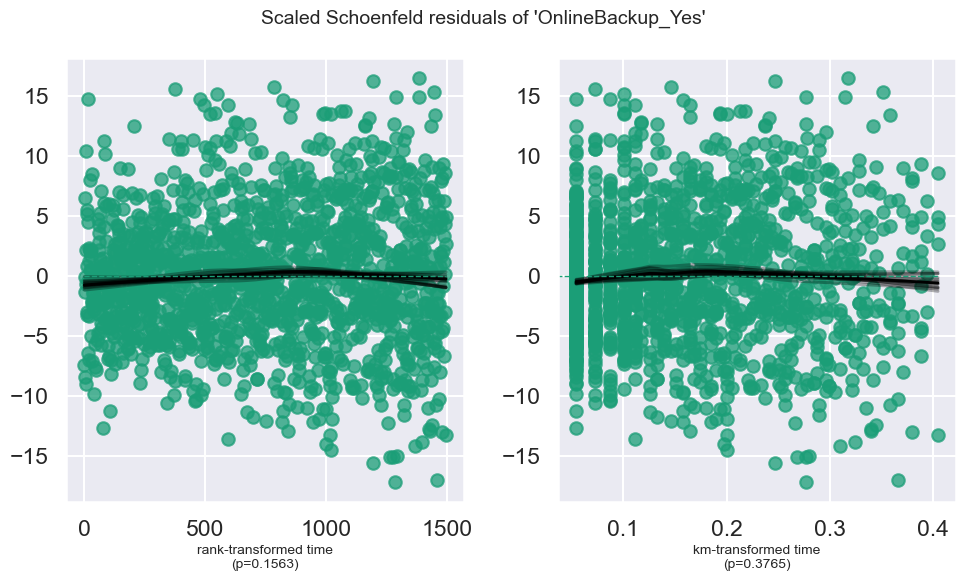

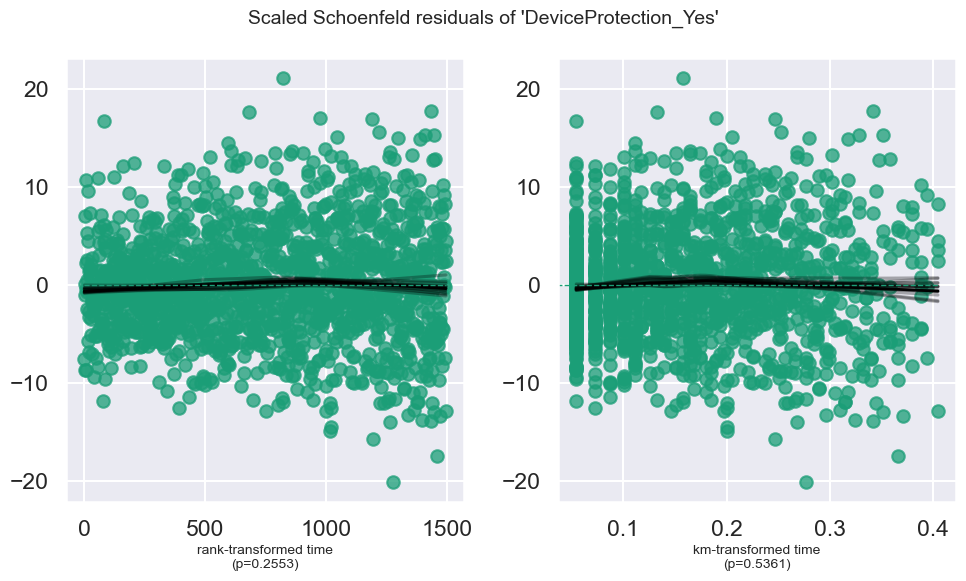

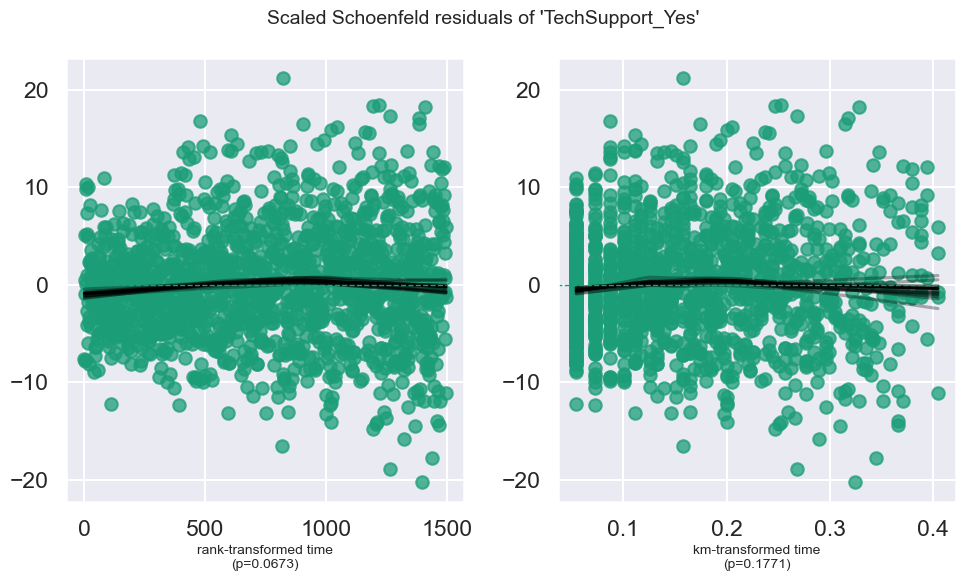

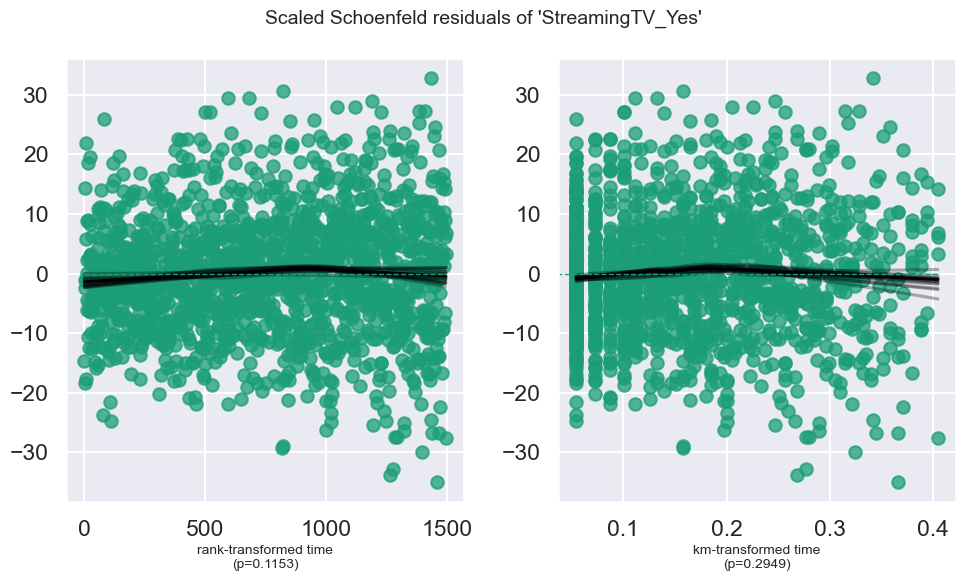

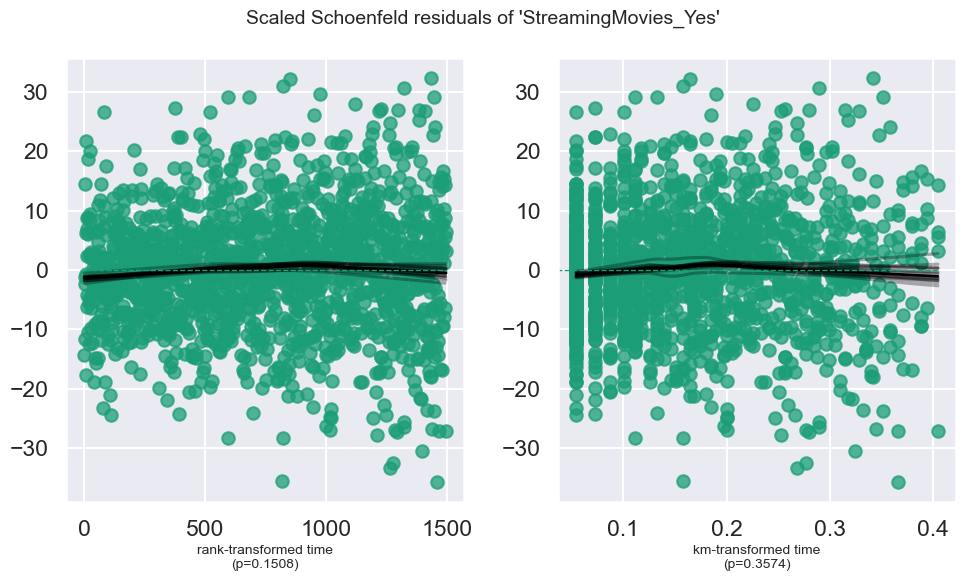

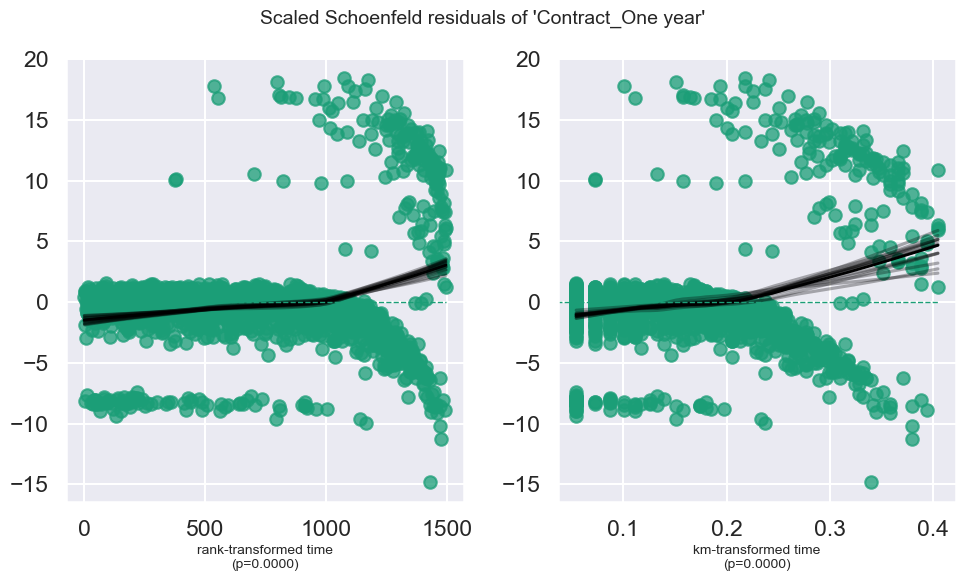

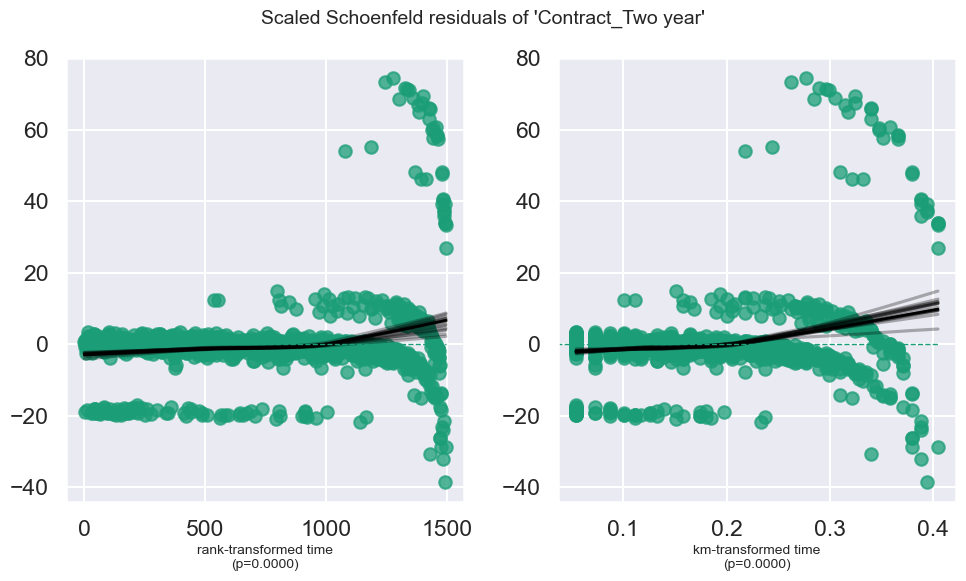

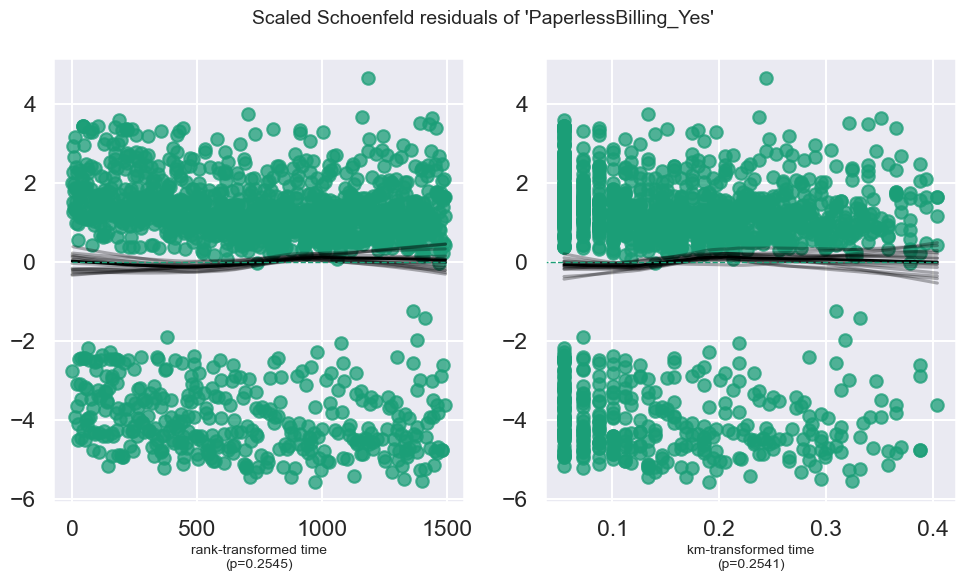

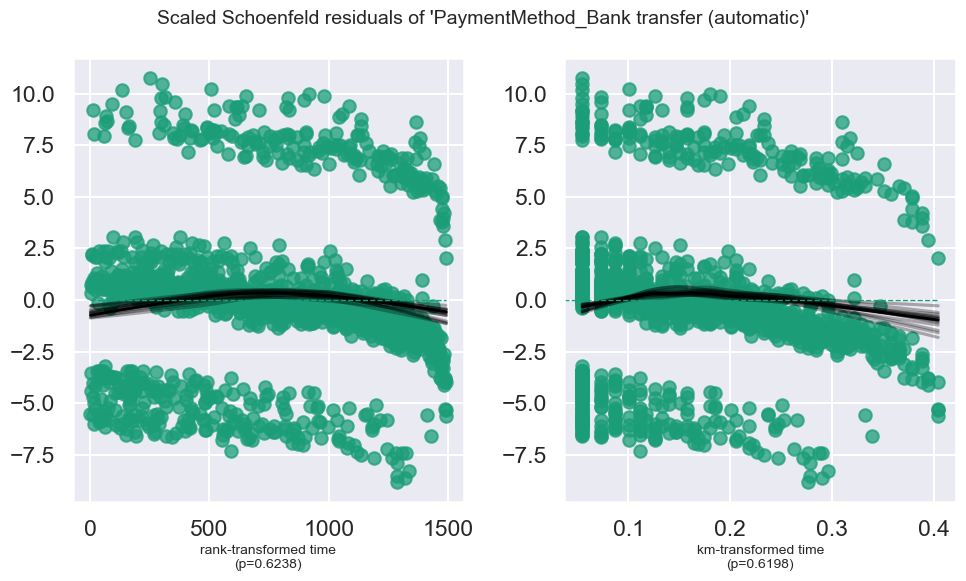

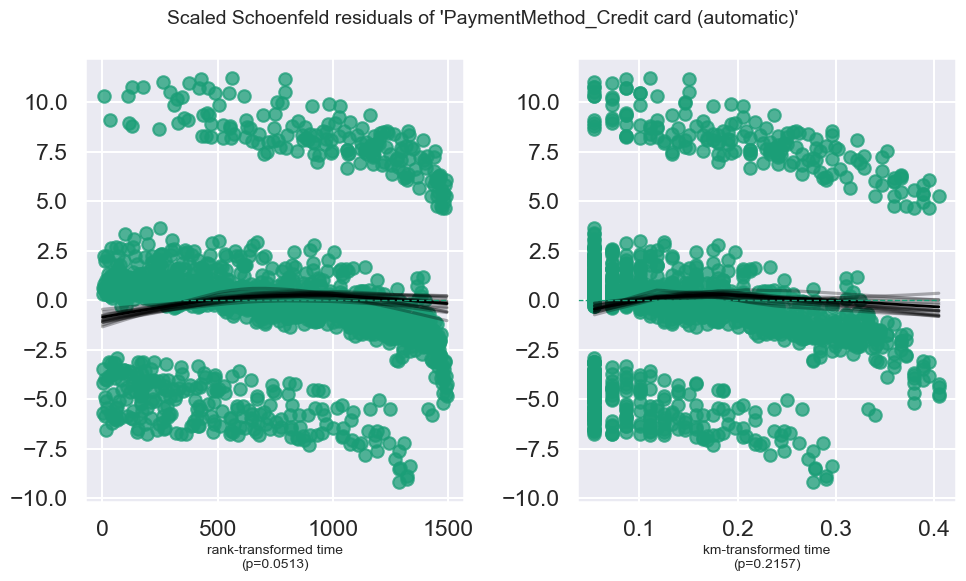

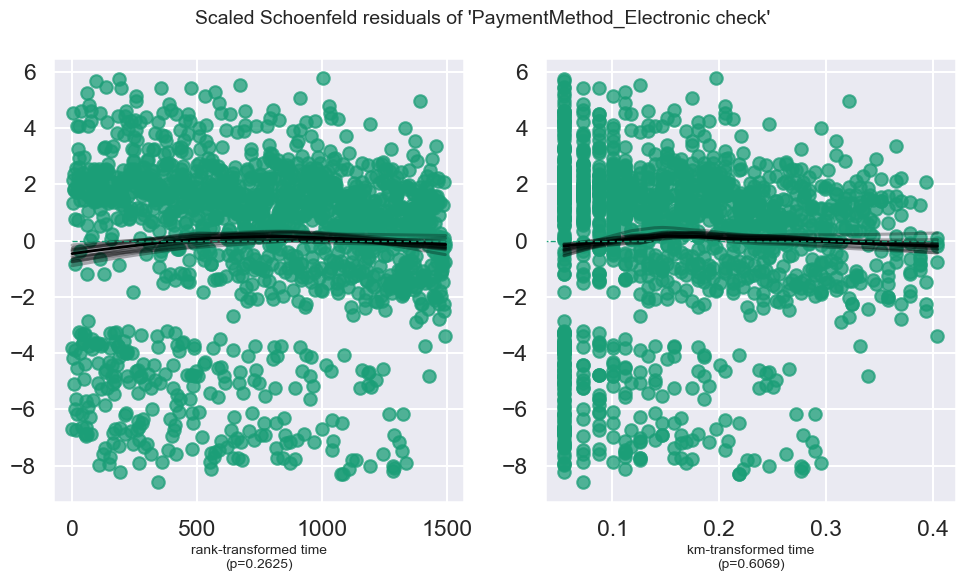

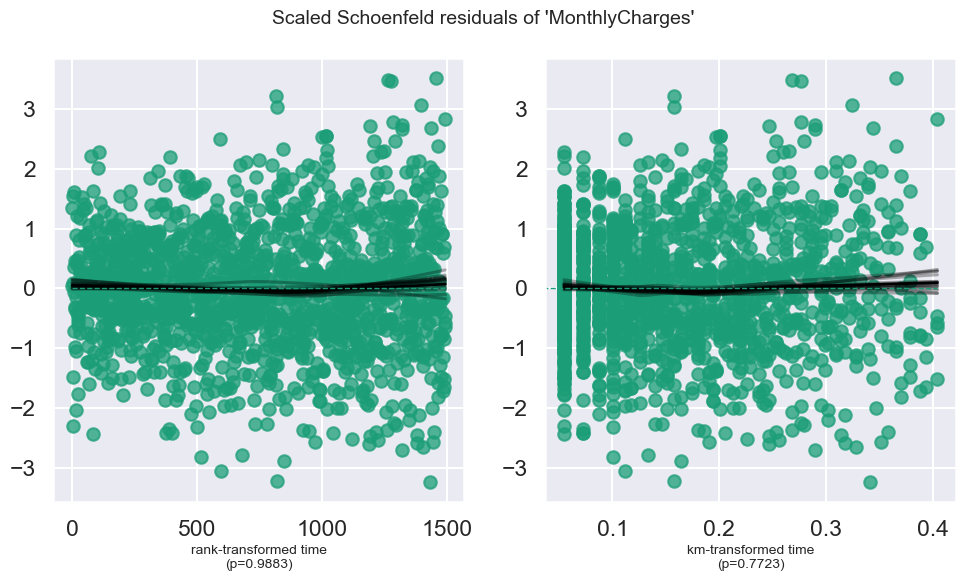

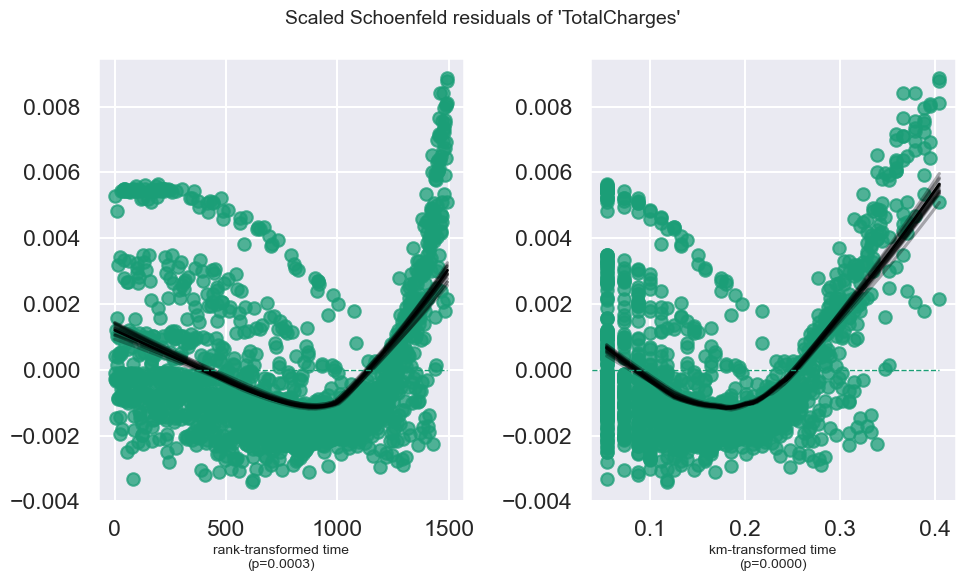

In [53]:
cph.check_assumptions(cph_train, p_value_threshold=0.05, show_plots=True)

### Churn Prediction
Some Usable Information Are Available Now To Make Decisions About How To Reduce And Prevent Churn. Now Focus On Predictive Analytics. Not Much Can Be Done For The Ustomers Who Have Already Left, So Selecting Only The Remaining Customers From The Dataset.

First Step Is To To Calculate Conditional Probability.

Assuming T = Event Time For Some Churn To Happen, And S(t): = P(T > t) Is The Survival Function.
We Are Interested To Know What Is The New Survival Function, Given We Know The Customer Was Earlier In The List Past Time S.

P(T > t|T > s) = [P(T> t And T > s)] / P(T > s) = P(T > t) / P(T > s) =S(t) / S(s)

Thus Scaling The Original Survival Function By The Survival Function At Time s (Everything Prior To S Should Be Mapped To 1.0 As Well, Since The Whole Statistics Id Based On Probabilities.

In [54]:
from lifelines.datasets import load_regression_dataset

df = load_regression_dataset()

censored_subjects = a.loc[a['Churn_Yes'] == 0]
unconditioned_sf = cph.predict_survival_function(censored_subjects)
conditioned_sf = unconditioned_sf.apply(lambda c: (c / c.loc[a.loc[c.name, 'tenure']]))

Applied ‘unconditioned’ Survival Functions Because Some Of These Curves Will Predict Churn Before The Customer’s Current Tenure Time. Moreover, Need To Condition The Predictions On The Basis That The Customers Were Still With With The Company When The Data Was Collected.

The Individual Customers Can Be Investigated From Survival Curve And See How The Conditioning Has Affected Their Survival Over The Baseline Rate.

Text(0.5, 1.0, 'Survival Curve')

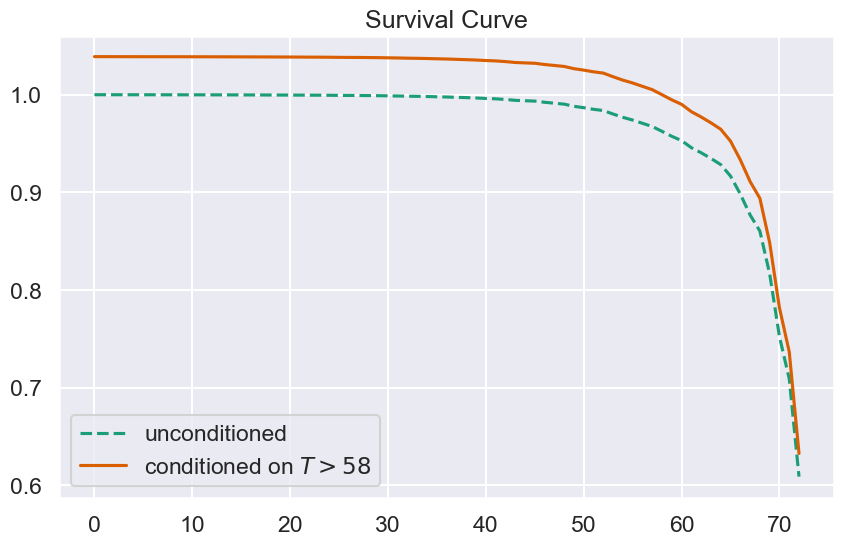

In [55]:
subject = 12
unconditioned_sf[subject].plot(ls="--", label="unconditioned")
conditioned_sf[subject].plot(label="conditioned on $T>58$")
plt.legend()
plt.title('Survival Curve')

The Above Plot Shows That, Customer 12 Is Still A Customer After 58 Months Means His Survival Curve Drops Slower Than The Baseline For The Customers Similar But Without That Condition. There Is Around A 50% Chance That A Customer Longer Than 70 Months (Almost 6 Years) Will Churn. Need To Check If This Is Consistent With The Business’ Understanding Of Their Customer Life-cycle. If The Customers Are Churning Much Earlier/later Than The Business Perceives Them To Be, Then The Business May Have To Tweak The Customer Life-cycle Management.

It Also May Be A Good Idea To Intervene And Incentive Customers Who Have Already Stayed For 6 Years. Since Their Probability Of Staying Is Dipping Below 50%, Then Without Intervention, They Are More Likely To Churn Than Not To Churn. However, These Are Business And Strategy Decesions To Make.

Selecting A Single Customer As A Prediction For How Long The Customer Will Last, Which We Can Use To Determine Intervention Value. Used The Median To Get A Single Row That Has The Number Of Months (Tenure) Where The Customer Has 50% Likelihood Of Churning.

In [56]:
from lifelines.utils import median_survival_times, qth_survival_times

predictions_50 = median_survival_times(conditioned_sf)
# This Is The Same, But You Can Change The Fraction To Get Other %tiles. 
# Predictions_50 = Qth_survival_times(.50, Conditioned_sf)

In [57]:
# Using This Single Row And By Joining It To Our Data Dataframe Can Investigate 
# The Predicted Remaining Value A Customer Has For The Business:

values = predictions_50.T.join(a[['MonthlyCharges','tenure']])
values['RemainingValue'] = values['MonthlyCharges'] * (values[0.5] - values['tenure'])

values.head()

0.5  MonthlyCharges  tenure  RemainingValue
0  22.0           29.85       1          626.85
1  49.0           56.95      34          854.25
3  60.0           42.30      45          634.50
6  31.0           89.10      22          801.90
7  26.0           29.75      10          476.00

The Column Named 0.5 Is The Single Row We Received From The Median_survival_times Call. It Can Be Seen Here That, By Multiplying The Monthlycharges By The Difference Between The Customer’s Current Tenure And Their Median Cancellation Date, A Visbility Is Available For Which Customers Would Inflict The Most Damage To The Top Line. This Single Row Can Be Joined To The Origial Data To Investigate The Predicted Remaining Value A Customer Has For The Business. Moreover, By Multiplying The Monthlycharges By The Difference Between The Customer’s Current Tenure And Their Median Cancellation Date, Business May Have An Idea For Which Customers Would Inflict The Most Damage To Their Top Line.

#### Churn Prevention
A List Of Customers Can Be Prepared Now, Who Are The Highest Risk For Churn. The Goal Would Be To Retain Them.

Reviewing The Coefficient Chart Again, The Most Significant Features Which Impact Survival Positively Are Identified-

    - 2 Year Contract
    - 1 Year Contract
    - Credit Card Payment
    - Bank Transfer Payment
Beyond These Four The Increases In Survival Become Minimal And The Results Aren’t Significant Anyway. Stakeholders Need To Understand How Much They Can Spend To Keep Customers Is Compare Their Survival Rates With Customer Similar To Them Who Instead Have Each Of These Four Features Present. Going To Statistics Again-

In [ ]:
upgrades = ['PaymentMethod_Credit card (automatic)', 'PaymentMethod_Bank transfer (automatic)',
            'Contract_One year',
            'Contract_Two year']

results_dict = {}
for customer in values.index:
    actual = a.loc[[customer]]
    change = a.loc[[customer]]
    results_dict[customer] = [cph.predict_median(actual)]
    for upgrade in upgrades: 
        change[upgrade] = 1 if list(change[upgrade]) == [0] else 0
        results_dict[customer].append(cph.predict_median(change))
        change[upgrade] = 1 if list(change[upgrade]) == [0] else 0

results_df = pd.DataFrame(results_dict).T
results_df.columns = ['baseline'] + upgrades
actions = values.join(results_df).drop([0.5], axis=1)

In [ ]:
actions.head()

##### It Can Be Seen From This That If Telecom Company Can Manage To Get The First Customer To Use A Credit Card Payments That Could Increase The Survival Time By 3 Months (26– 23 Baseline) And So On. This Input Helps To Take Necessary Strategy To Retain Customers.
#### To Understand The Financial Impact-

In [ ]:
actions['CreditCard Diff'] = (
    actions['PaymentMethod_Credit card (automatic)'] - actions['baseline']) * actions['MonthlyCharges']

actions['BankTransfer Diff'] = (
    actions['PaymentMethod_Bank transfer (automatic)'] - actions['baseline']) * actions['MonthlyCharges']

actions['1yrContract Diff'] = (
    actions['Contract_One year'] - actions['baseline']) * actions['MonthlyCharges']

actions['2yrContract Diff'] = (
    actions['Contract_Two year'] - actions['baseline']) * actions['MonthlyCharges']

actions.head()

##### Here, The Moving The Customer In The First Row To Paying By Credit Card Could Be Worth Up To Dollar 119.40. That’ Is A Valuable Information For Business To Check.
#### Accuracy And Calibration
Though Model Displayed 92.9% Concordance, But Considering Probabilistic View Of Events Like Churn It Is Necessary To Check For Calibration Than Accuracy.

In [ ]:
from sklearn.calibration import calibration_curve

plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)

ax1.plot([0, 1], [0, 1], "k:", label="Calibrated")

probs = 1 - np.array(cph.predict_survival_function(cph_test).loc[13])
actual = cph_test['Churn_Yes']

fraction_of_positives, mean_predicted_value = \
calibration_curve(actual, probs, n_bins=10, normalize=False)

ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
        label="%s" % ("CoxPH",))


ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plot for Churn prediction')

Running The Example Creates A Reliability Diagram Showing The Calibration Of The Predicted Probabilities (Solid Line) Compared To A Perfectly Calibrated Model Along The Diagonal Of The Plot (Dashed Line.). The Coxph Line Is Closer To The Diagonal Line Representing Good Calibration. However, The Model Seems To Underpredict Risk At The Low End (< 50% Chance Of Churn) And Slightly Overpredict Risk At The High End (> 50% Chance Of Churn).

In [ ]:
from sklearn.metrics import brier_score_loss
brier_score_loss(
    cph_test['Churn_Yes'], 1 - np.array(cph.predict_survival_function(cph_test).loc[13]), pos_label=1
    )

##### Indexing At Tenure Is Set At 13 Because The Model Works Over A Range Of Time Periods, So, Have To Inspect The Calibration At Each Step In Order To Get A Feel For Accuracy.

In [ ]:
loss_dict = {}
for i in range(1,73):
    score = brier_score_loss(
        cph_test['Churn_Yes'], 1 - np.array(cph.predict_survival_function(cph_test).loc[i]), pos_label=1
    )
    loss_dict[i] = [score]

loss_df = pd.DataFrame(loss_dict).T

fig, ax = plt.subplots()
ax.plot(loss_df.index, loss_df)

ax.set(xlabel='Prediction Time', ylabel='Calibration Loss',
       title='Cox PH Model Calibration Loss / Time')
ax.grid()
plt.show()

##### The Model Is Well Calibrated Between 5 And 25 Months

In [ ]:
loss_df.columns = ['loss']
temp_df = actions.reset_index().set_index('PaymentMethod_Credit card (automatic)').join(loss_df)
temp_df = temp_df.set_index('index')
actions['CreditCard Lower'] = temp_df['CreditCard Diff'] - (temp_df['loss'] * temp_df['CreditCard Diff'])
actions['CreditCard Upper'] = temp_df['CreditCard Diff'] + (temp_df['loss'] * temp_df['CreditCard Diff'])

temp_df = actions.reset_index().set_index('PaymentMethod_Bank transfer (automatic)').join(loss_df)
temp_df = temp_df.set_index('index')
actions['BankTransfer Lower'] = temp_df['BankTransfer Diff'] - (.5 * temp_df['loss'] * temp_df['BankTransfer Diff'])
actions['BankTransfer Upper'] = temp_df['BankTransfer Diff'] + (.5 * temp_df['loss'] * temp_df['BankTransfer Diff'])
temp_df = actions.reset_index().set_index('Contract_One year').join(loss_df)
temp_df = temp_df.set_index('index')
actions['1yrContract Lower'] = temp_df['1yrContract Diff'] - (.5 * temp_df['loss'] * temp_df['1yrContract Diff'])
actions['1yrContract Upper'] = temp_df['1yrContract Diff'] + (.5 * temp_df['loss'] * temp_df['1yrContract Diff'])
temp_df = actions.reset_index().set_index('Contract_Two year').join(loss_df)
temp_df = temp_df.set_index('index')
actions['2yrContract Lower'] = temp_df['2yrContract Diff'] - (.5 * temp_df['loss'] * temp_df['2yrContract Diff'])
actions['2yrContract Upper'] = temp_df['2yrContract Diff'] + (.5 * temp_df['loss'] * temp_df['2yrContract Diff'])

In [ ]:
temp_df.head()

##### For Each Time Period Telecom Company Wants To Predict That A Specific Upgrade Will Produce And Create A Lower And Upper Bound Around The Estimated Return On Investment.